# Benchmark Results
This notebook visualizes the output from the different models on different classification problems

In [1]:
import collections
import glob
import json
import os

import numpy as np
import pandas as pd
from plotnine import *

from saged.utils import split_sample_names, create_dataset_stat_df, get_dataset_stats, parse_map_file

## Set Up Functions and Get Metadata

In [2]:
def return_unlabeled():
    # For use in a defaultdict
    return 'unlabeled'

In [3]:
data_dir = '../../data/'
map_file = os.path.join(data_dir, 'sample_classifications.pkl')

sample_to_label = parse_map_file(map_file)
sample_to_label = collections.defaultdict(return_unlabeled, sample_to_label)

In [4]:
metadata_path = os.path.join(data_dir, 'aggregated_metadata.json')
metadata = None
with open(metadata_path) as json_file:
    metadata = json.load(json_file)
sample_metadata = metadata['samples']

In [5]:
experiments = metadata['experiments']
sample_to_study = {}
for study in experiments:
    for accession in experiments[study]['sample_accession_codes']:
        sample_to_study[accession] = study

## Sepsis classification

In [8]:
in_files = glob.glob('../../results/single_label.*')
in_files = [file for file in in_files if 'be_corrected' not in file]
print(in_files[:5])

['../../results/single_label.sepsis.pseudolabel.refinebio_labeled_dataset.3.tsv', '../../results/single_label.sepsis.PCA.deep_net.refinebio_labeled_dataset.4.tsv', '../../results/single_label.sepsis.deep_net.refinebio_labeled_dataset.1.tsv', '../../results/single_label.sepsis.PCA.pytorch_supervised.refinebio_labeled_dataset.3.tsv', '../../results/single_label.sepsis.PCA.pytorch_supervised.refinebio_labeled_dataset.2.tsv']


In [9]:
sepsis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('sepsis.')[-1]
    model_info = model_info.split('.')
        
    if len(model_info) == 4:
        unsupervised_model = model_info[0]
        supervised_model = model_info[1]
    else:
        unsupervised_model = 'untransformed'
        supervised_model = model_info[0]
             
    new_df['unsupervised'] = unsupervised_model
    new_df['supervised'] = supervised_model
        
    sepsis_metrics = pd.concat([sepsis_metrics, new_df])
    
sepsis_metrics

,accuracy,train studies,train sample count,unsupervised,supervised
0,0.843023,"GSE3037,GSE14882,GSE13015,GSE33118,GSE112811,G...",2599,untransformed,pseudolabel
1,0.975669,"GSE98793,GSE3037,GSE13015,GSE33118,GSE112811,G...",2293,untransformed,pseudolabel
2,0.795724,"GSE98793,GSE14882,GSE13015,GSE33118,GSE112811,...",2694,untransformed,pseudolabel
3,0.967342,"GSE98793,GSE14882,GSE3037,GSE33118,GSE3284,SRP...",2227,untransformed,pseudolabel
4,0.901709,"GSE98793,GSE14882,GSE3037,GSE13015,GSE112811,G...",2647,untransformed,pseudolabel
...,...,...,...,...,...
0,0.950241,"GSE65088,SRP049820,GSE5504,GSE38511,GSE33341,G...",2492,PCA,pytorch_supervised
1,0.840517,"GSE38511,GSE33341,GSE65682,GSE14844,SRP092402,...",2651,PCA,pytorch_supervised
2,0.964981,"GSE65088,SRP049820,GSE5504,GSE38511,GSE33341,G...",2344,PCA,pytorch_supervised
3,0.901361,"GSE65088,SRP049820,GSE5504,GSE33341,GSE65682,G...",2821,PCA,pytorch_supervised


/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


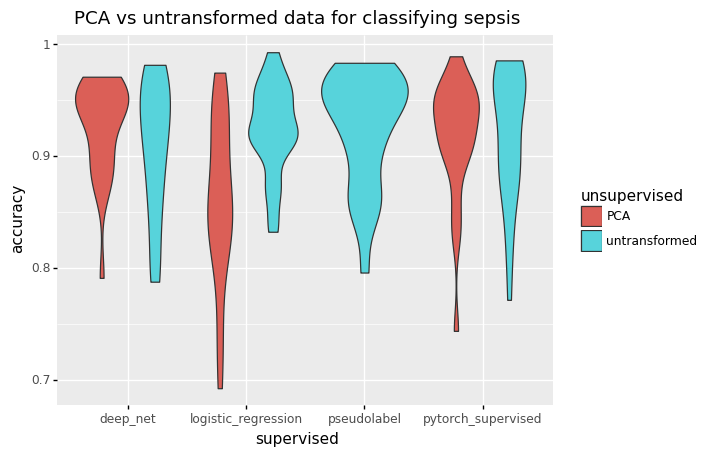

<ggplot: (8737390871441)>


In [10]:
plot = ggplot(sepsis_metrics, aes(x='supervised', y='accuracy', fill='unsupervised')) 
plot += geom_violin()
plot += ggtitle('PCA vs untransformed data for classifying sepsis')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


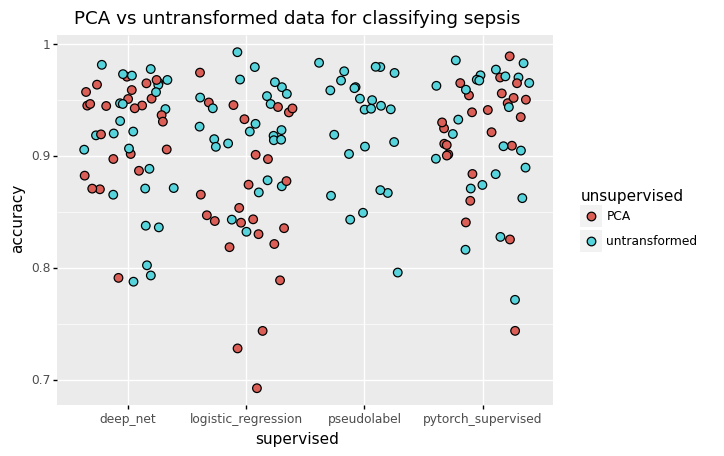

<ggplot: (8737390824202)>


In [11]:
plot = ggplot(sepsis_metrics, aes(x='supervised', y='accuracy', fill='unsupervised')) 
plot += geom_jitter(size=3)
plot += ggtitle('PCA vs untransformed data for classifying sepsis')
print(plot)

## All labels

In [12]:
in_files = glob.glob('../../results/all_labels.*')
in_files = [file for file in in_files if 'be_corrected' not in file]
print(in_files[:5])

['../../results/all_labels.deep_net.refinebio_labeled_dataset.2.tsv', '../../results/all_labels.PCA.logistic_regression.refinebio_labeled_dataset.0.tsv', '../../results/all_labels.deep_net.refinebio_labeled_dataset.0.tsv', '../../results/all_labels.PCA.logistic_regression.refinebio_labeled_dataset.4.tsv', '../../results/all_labels.PCA.deep_net.refinebio_labeled_dataset.1.tsv']


In [13]:
metrics = None
for path in in_files:
    if metrics is None:
        metrics = pd.read_csv(path, sep='\t')
        
        model_info = path.strip('.tsv').split('all_labels.')[-1]
        
        model_info = model_info.split('.')
        
        if len(model_info) == 4:
            unsupervised_model = model_info[0]
            supervised_model = model_info[1]
        else:
            unsupervised_model = 'untransformed'
            supervised_model = model_info[0]
             
        metrics['unsupervised'] = unsupervised_model
        metrics['supervised'] = supervised_model
    else:
        new_df = pd.read_csv(path, sep='\t')
        model_info = path.strip('.tsv').split('all_labels.')[-1]
        model_info = model_info.split('.')
        
        if len(model_info) == 4:
            unsupervised_model = model_info[0]
            supervised_model = model_info[1]
        else:
            unsupervised_model = 'untransformed'
            supervised_model = model_info[0]
             
        new_df['unsupervised'] = unsupervised_model
        new_df['supervised'] = supervised_model
        
        metrics = pd.concat([metrics, new_df])

metrics

,accuracy,train studies,train sample count,unsupervised,supervised
0,0.015056,"GSE15316,GSE9960,GSE51808,GSE84844,GSE45923,GS...",8175,untransformed,deep_net
1,0.019048,"GSE15316,GSE51808,GSE5504,GSE84844,GSE45923,GS...",7189,untransformed,deep_net
2,0.000000,"GSE15316,GSE9960,GSE51808,GSE5504,GSE84844,GSE...",8222,untransformed,deep_net
3,0.041231,"GSE9960,GSE45923,GSE5504,GSE98793,GSE112811,GS...",8512,untransformed,deep_net
4,0.002149,"GSE15316,GSE9960,GSE51808,GSE5504,GSE84844,GSE...",8838,untransformed,deep_net
...,...,...,...,...,...
0,0.002183,"GSE93272,E-MEXP-3567,GSE79150,SRP132709,GSE570...",8402,untransformed,logistic_regression
1,0.070588,"GSE42305,E-MEXP-3567,GSE61240,GSE79150,GSE9327...",8109,untransformed,logistic_regression
2,0.053706,"GSE42305,E-MEXP-3567,GSE61240,SRP132709,GSE791...",7981,untransformed,logistic_regression
3,0.017518,"GSE42305,GSE61240,SRP132709,GSE57065,GSE13015,...",8864,untransformed,logistic_regression


/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


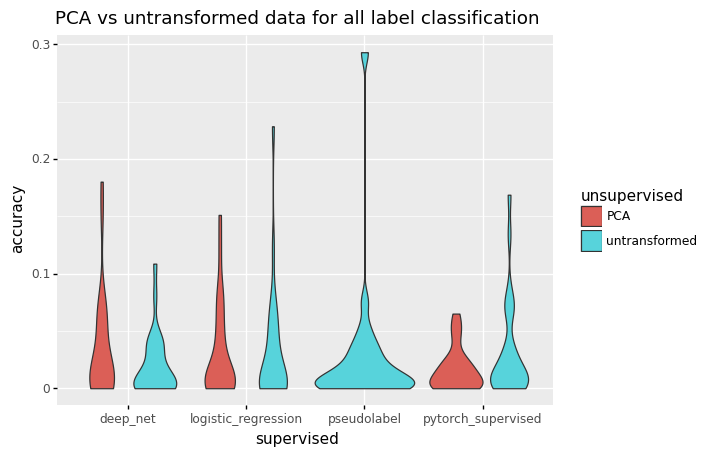

<ggplot: (8737390826614)>


In [14]:
plot = ggplot(metrics, aes(x='supervised', y='accuracy', fill='unsupervised')) 
plot += geom_violin()
plot += ggtitle('PCA vs untransformed data for all label classification')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


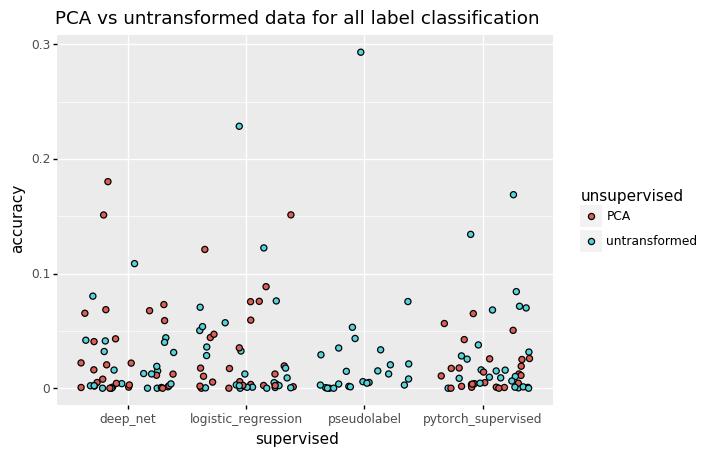

<ggplot: (8737381257771)>


In [15]:
plot = ggplot(metrics, aes(x='supervised', y='accuracy', fill='unsupervised')) 
plot += geom_jitter(size=2)
plot += ggtitle('PCA vs untransformed data for all label classification')
print(plot)

# Subsets of healthy labels

In [16]:
in_files = glob.glob('../../results/subset_label.sepsis*')
in_files = [file for file in in_files if 'be_corrected' not in file]
print(in_files[:5])

['../../results/subset_label.sepsis.pytorch_supervised.refinebio_labeled_dataset.4.tsv', '../../results/subset_label.sepsis.deep_net.refinebio_labeled_dataset.2.tsv', '../../results/subset_label.sepsis.logistic_regression.refinebio_labeled_dataset.3.tsv', '../../results/subset_label.sepsis.PCA.deep_net.refinebio_labeled_dataset.4.tsv', '../../results/subset_label.sepsis.deep_net.refinebio_labeled_dataset.1.tsv']


In [17]:
sepsis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('sepsis.')[-1]
    model_info = model_info.split('.')
        
    if len(model_info) == 4:
        unsupervised_model = model_info[0]
        supervised_model = model_info[1]
    else:
        unsupervised_model = 'untransformed'
        supervised_model = model_info[0]
             
    new_df['unsupervised'] = unsupervised_model
    new_df['supervised'] = supervised_model
        
    sepsis_metrics = pd.concat([sepsis_metrics, new_df])
    
sepsis_metrics = sepsis_metrics.rename({'fraction of healthy used': 'healthy_used'}, axis='columns')
sepsis_metrics['healthy_used'] = sepsis_metrics['healthy_used'].round(1)
    
sepsis_metrics

,accuracy,train studies,train sample count,healthy_used,unsupervised,supervised
0,0.910112,"GSE112811,GSE99039,GSE33341,GSE93606,GSE28750,...",1386,0.1,untransformed,pytorch_supervised
1,0.917431,"GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...",1548,0.2,untransformed,pytorch_supervised
2,0.923077,"GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...",1710,0.3,untransformed,pytorch_supervised
3,0.926667,"GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...",1871,0.4,untransformed,pytorch_supervised
4,0.953216,"GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...",2033,0.5,untransformed,pytorch_supervised
...,...,...,...,...,...,...
35,0.951087,"GSE33119,GSE65088,GSE98793,GSE66099,GSE50635,G...",1425,0.6,PCA,pytorch_supervised
36,0.978261,"GSE33119,GSE65088,GSE98793,GSE66099,GSE50635,G...",1478,0.7,PCA,pytorch_supervised
37,0.961957,"GSE33119,GSE65088,GSE98793,GSE66099,GSE50635,G...",1530,0.8,PCA,pytorch_supervised
38,0.951087,"GSE33119,GSE65088,GSE98793,GSE66099,GSE50635,G...",1583,0.9,PCA,pytorch_supervised


In [18]:
print(sepsis_metrics[sepsis_metrics['healthy_used'] == 1])

    accuracy                                      train studies  \
9   0.941392  GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...   
19  0.962919  GSE50635,GSE33341,GSE3284,GSE38511,SRP049820,S...   
29  0.924794  GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...   
39  0.908333  GSE112811,GSE99039,GSE3284,GSE93606,GSE28750,G...   
49  0.880460  GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...   
..       ...                                                ...   
39  0.996610  GSE64338,GSE83456,GSE26378,GSE65682,GSE65088,G...   
9   0.909605  GSE65088,GSE42834,GSE37171,GSE98793,GSE50635,S...   
19  1.000000  GSE33119,GSE65088,GSE42834,GSE50635,GSE66099,G...   
29  0.982456  GSE33119,GSE50635,GSE66099,GSE98793,GSE57065,G...   
39  0.961957  GSE33119,GSE65088,GSE98793,GSE66099,GSE50635,G...   

    train sample count  healthy_used   unsupervised           supervised  
9                 2842           1.0  untransformed   pytorch_supervised  
19                2279           1.0  untrans

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


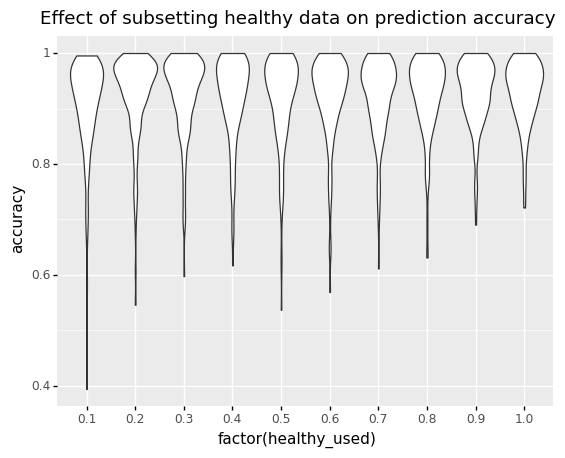

<ggplot: (8737390824205)>


In [19]:
plot = ggplot(sepsis_metrics, aes(x='factor(healthy_used)', y='accuracy', )) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


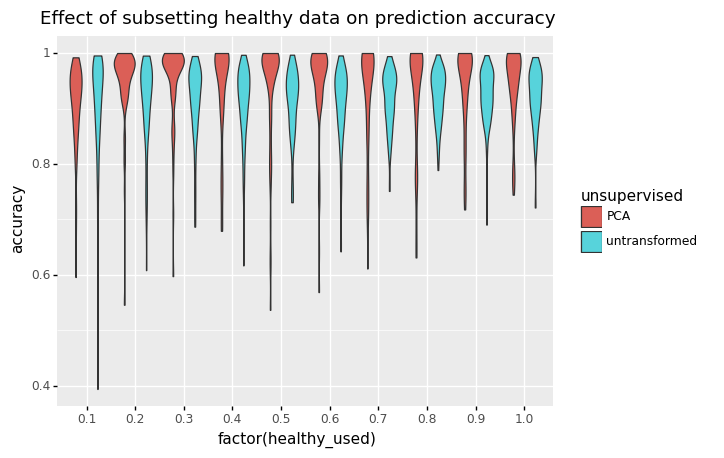

<ggplot: (8737381250545)>


In [20]:
plot = ggplot(sepsis_metrics, aes(x='factor(healthy_used)', y='accuracy', fill='unsupervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


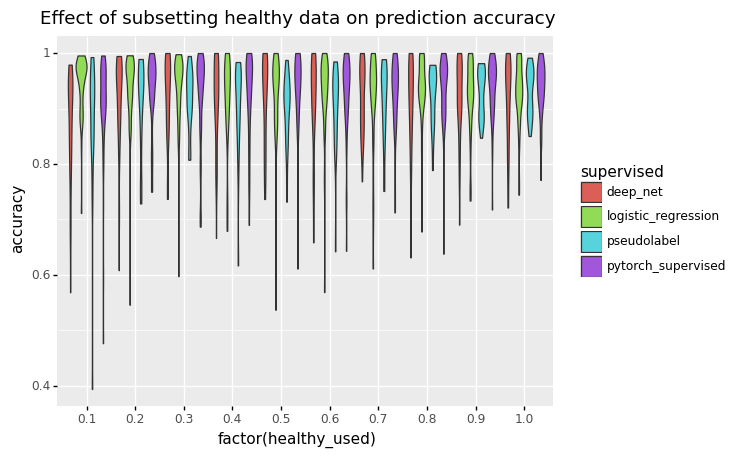

<ggplot: (8737375789559)>


In [21]:
plot = ggplot(sepsis_metrics, aes(x='factor(healthy_used)', y='accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

## Same analysis, but with tb instead of sepsis

In [22]:
in_files = glob.glob('../../results/subset_label.tb*')
in_files = [file for file in in_files if 'be_corrected' not in file]
print(in_files[:5])

['../../results/subset_label.tb.deep_net.refinebio_labeled_dataset.1.tsv', '../../results/subset_label.tb.PCA.pytorch_supervised.refinebio_labeled_dataset.0.tsv', '../../results/subset_label.tb.pytorch_supervised.refinebio_labeled_dataset.3.tsv', '../../results/subset_label.tb.PCA.deep_net.refinebio_labeled_dataset.1.tsv', '../../results/subset_label.tb.PCA.pytorch_supervised.refinebio_labeled_dataset.1.tsv']


In [23]:
tuberculosis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('tb.')[-1]
    model_info = model_info.split('.')
        
    if len(model_info) == 4:
        unsupervised_model = model_info[0]
        supervised_model = model_info[1]
    else:
        unsupervised_model = 'untransformed'
        supervised_model = model_info[0]
             
    new_df['unsupervised'] = unsupervised_model
    new_df['supervised'] = supervised_model
        
    tuberculosis_metrics = pd.concat([tuberculosis_metrics, new_df])
    
tuberculosis_metrics = tuberculosis_metrics.rename({'fraction of healthy used': 'healthy_used'}, axis='columns')
tuberculosis_metrics['healthy_used'] = tuberculosis_metrics['healthy_used'].round(1)
tuberculosis_metrics

,accuracy,train studies,train sample count,healthy_used,unsupervised,supervised
0,0.676301,"GSE26440,GSE55201,GSE98793,SRP092402,GSE93606,...",771,0.1,untransformed,deep_net
1,0.665025,"GSE26440,GSE55201,GSE98793,SRP092402,GSE93606,...",923,0.2,untransformed,deep_net
2,0.562232,"GSE26440,GSE55201,GSE98793,SRP092402,GSE93606,...",1075,0.3,untransformed,deep_net
3,0.688213,"GSE26440,GSE55201,GSE98793,SRP092402,GSE93606,...",1227,0.4,untransformed,deep_net
4,0.593857,"GSE26440,GSE55201,GSE98793,SRP092402,GSE93606,...",1379,0.5,untransformed,deep_net
...,...,...,...,...,...,...
35,0.493113,"GSE83456,GSE8121,GSE58411,GSE26049,GSE93272,GS...",544,0.6,PCA,pytorch_supervised
36,0.487603,"GSE83456,GSE8121,GSE58411,GSE26049,GSE93272,GS...",569,0.7,PCA,pytorch_supervised
37,0.330579,"GSE83456,GSE8121,GSE58411,GSE26049,GSE93272,GS...",593,0.8,PCA,pytorch_supervised
38,0.584022,"GSE83456,GSE8121,GSE58411,GSE26049,GSE93272,GS...",617,0.9,PCA,pytorch_supervised


In [24]:
print(tuberculosis_metrics[tuberculosis_metrics['healthy_used'] == 1])

    accuracy                                      train studies  \
9   0.726862  GSE26440,GSE55201,GSE98793,SRP092402,GSE93606,...   
19  0.978193  GSE45291,GSE38511,GSE14844,GSE98793,SRP092402,...   
29  0.648780  GSE45291,GSE26440,GSE38511,GSE14844,GSE98793,S...   
39  0.700809  GSE45291,GSE26440,GSE38511,GSE14844,GSE98793,S...   
49  0.647399  GSE45291,GSE26440,GSE38511,GSE14844,GSE55201,G...   
..       ...                                                ...   
49  0.625241  GSE26378,GSE8121,E-MEXP-1635,GSE5504,GSE66099,...   
9   0.000000  GSE83456,GSE8121,GSE4607,SRP071965,GSE99039,GS...   
19  0.613793  GSE83456,GSE8121,GSE4607,GSE99039,GSE65682,GSE...   
29  0.513812  GSE8121,GSE4607,GSE58411,GSE65682,GSE26049,GSE...   
39  0.258953  GSE83456,GSE8121,GSE58411,GSE26049,GSE93272,GS...   

    train sample count  healthy_used   unsupervised          supervised  
9                 2140           1.0  untransformed            deep_net  
19                2262           1.0  untransfo

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


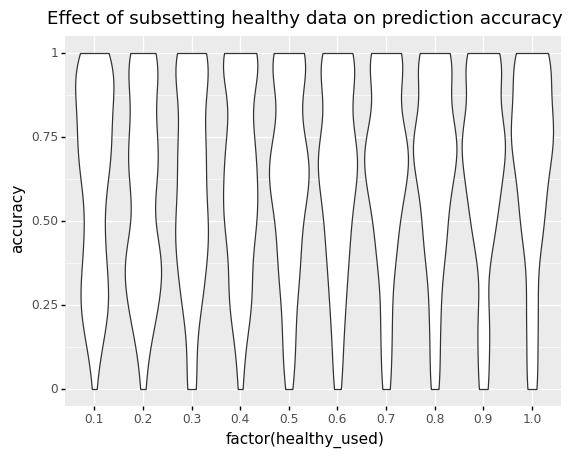

<ggplot: (8737696124350)>


In [25]:
plot = ggplot(tuberculosis_metrics, aes(x='factor(healthy_used)', y='accuracy')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


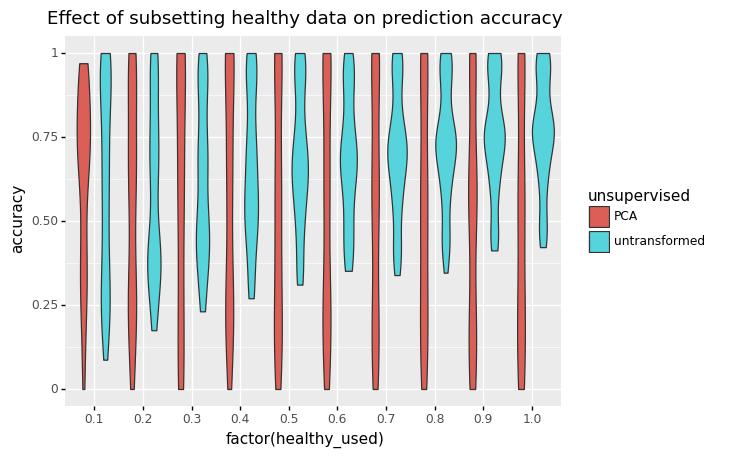

<ggplot: (8737390824253)>


In [26]:
plot = ggplot(tuberculosis_metrics, aes(x='factor(healthy_used)', y='accuracy', fill='unsupervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


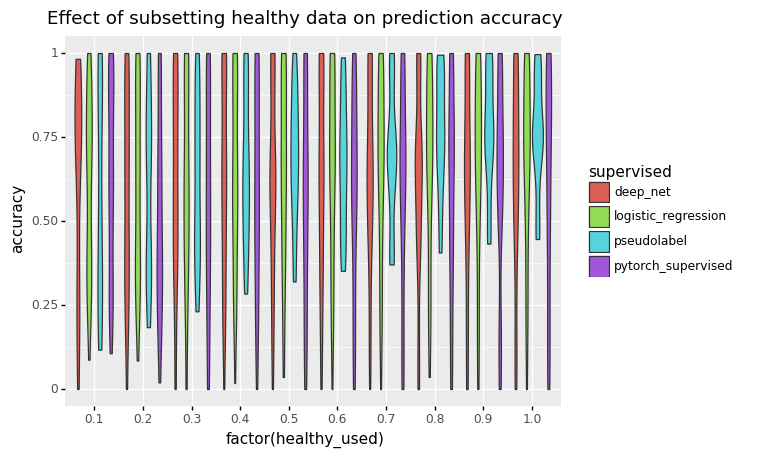

<ggplot: (8737390824286)>


In [27]:
plot = ggplot(tuberculosis_metrics, aes(x='factor(healthy_used)', y='accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

## Supervised Results Only
The results above show that unsupervised learning mostly hurts performance rather than helping.
The visualizations below compare each model based only on its supervised results.

In [28]:
supervised_sepsis = sepsis_metrics[sepsis_metrics['unsupervised'] == 'untransformed']

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


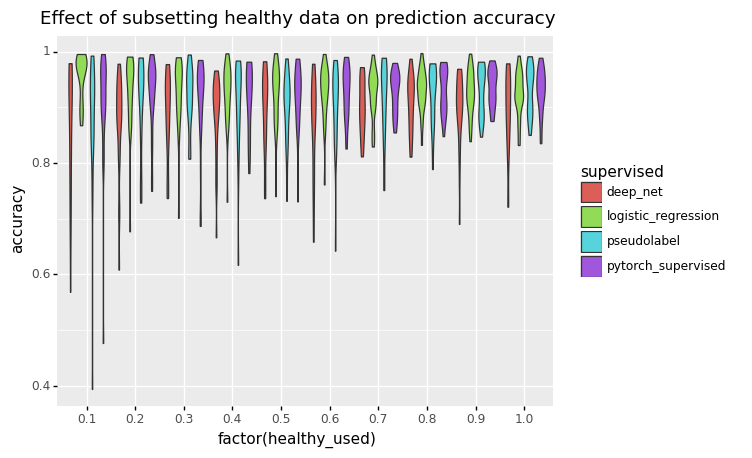

<ggplot: (8737375632204)>


In [29]:
plot = ggplot(supervised_sepsis, aes(x='factor(healthy_used)', y='accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

In [30]:
supervised_tb = tuberculosis_metrics[tuberculosis_metrics['unsupervised'] == 'untransformed']

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


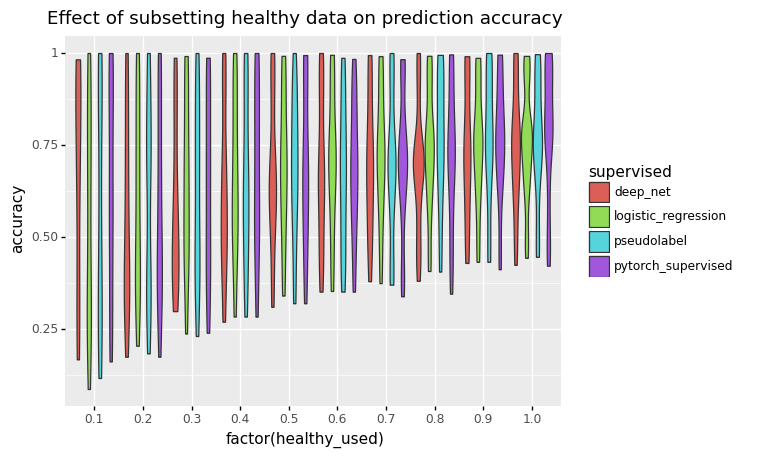

<ggplot: (8737375907488)>


In [31]:
plot = ggplot(supervised_tb, aes(x='factor(healthy_used)', y='accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


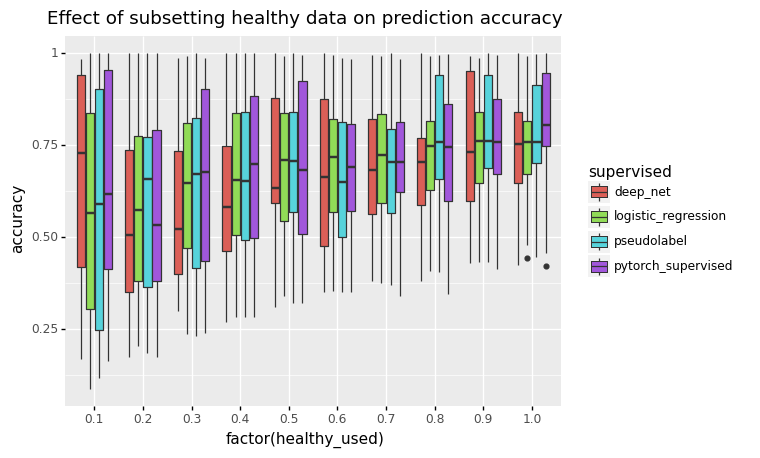

<ggplot: (8737375456278)>


In [32]:
plot = ggplot(supervised_tb, aes(x='factor(healthy_used)', y='accuracy', fill='supervised')) 
plot += geom_boxplot()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

## Batch Effect Correction

In [33]:
in_files = glob.glob('../../results/subset_label.sepsis*be_corrected.tsv')
print(in_files[:5])

['../../results/subset_label.sepsis.pytorch_supervised.refinebio_labeled_dataset.4.be_corrected.tsv', '../../results/subset_label.sepsis.deep_net.refinebio_labeled_dataset.0.be_corrected.tsv', '../../results/subset_label.sepsis.pytorch_supervised.refinebio_labeled_dataset.1.be_corrected.tsv', '../../results/subset_label.sepsis.deep_net.refinebio_labeled_dataset.3.be_corrected.tsv', '../../results/subset_label.sepsis.pytorch_supervised.refinebio_labeled_dataset.2.be_corrected.tsv']


In [34]:
sepsis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('sepsis.')[-1]
    print(model_info)
    model_info = model_info.split('.')
    print(model_info)
        
    supervised_model = model_info[0]
             
    new_df['supervised'] = supervised_model
        
    sepsis_metrics = pd.concat([sepsis_metrics, new_df])
    
sepsis_metrics = sepsis_metrics.rename({'fraction of healthy used': 'healthy_used'}, axis='columns')
sepsis_metrics['healthy_used'] = sepsis_metrics['healthy_used'].round(1)
    
sepsis_metrics

pytorch_supervised.refinebio_labeled_dataset.4.be_corrected
['pytorch_supervised', 'refinebio_labeled_dataset', '4', 'be_corrected']
deep_net.refinebio_labeled_dataset.0.be_corrected
['deep_net', 'refinebio_labeled_dataset', '0', 'be_corrected']
pytorch_supervised.refinebio_labeled_dataset.1.be_corrected
['pytorch_supervised', 'refinebio_labeled_dataset', '1', 'be_corrected']
deep_net.refinebio_labeled_dataset.3.be_corrected
['deep_net', 'refinebio_labeled_dataset', '3', 'be_corrected']
pytorch_supervised.refinebio_labeled_dataset.2.be_corrected
['pytorch_supervised', 'refinebio_labeled_dataset', '2', 'be_corrected']
logistic_regression.refinebio_labeled_dataset.2.be_corrected
['logistic_regression', 'refinebio_labeled_dataset', '2', 'be_corrected']
logistic_regression.refinebio_labeled_dataset.1.be_corrected
['logistic_regression', 'refinebio_labeled_dataset', '1', 'be_corrected']
deep_net.refinebio_labeled_dataset.4.be_corrected
['deep_net', 'refinebio_labeled_dataset', '4', 'be_corr

,accuracy,train studies,train sample count,healthy_used,supervised
0,0.808989,"GSE61635,GSE93606,SRP071965,GSE64338,GSE4607,G...",1386,0.1,pytorch_supervised
1,0.926606,"GSE61635,GSE93606,SRP071965,GSE64338,GSE4607,G...",1548,0.2,pytorch_supervised
2,0.800000,"GSE61635,GSE93606,SRP071965,GSE64338,GSE4607,G...",1710,0.3,pytorch_supervised
3,0.766667,"GSE61635,GSE93606,SRP071965,GSE64338,GSE4607,G...",1871,0.4,pytorch_supervised
4,0.789474,"GSE61635,GSE93606,SRP071965,GSE64338,GSE4607,G...",2033,0.5,pytorch_supervised
...,...,...,...,...,...
45,0.774854,"GSE65682,GSE45923,GSE37171,GSE98583,GSE95233,G...",2044,0.6,pytorch_supervised
46,0.909091,"GSE65682,GSE45923,GSE37171,GSE98583,GSE95233,G...",2194,0.7,pytorch_supervised
47,0.810345,"GSE65682,GSE45923,GSE37171,GSE98583,GSE95233,G...",2344,0.8,pytorch_supervised
48,0.849315,"GSE65682,GSE45923,GSE37171,GSE98583,GSE95233,G...",2494,0.9,pytorch_supervised


/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


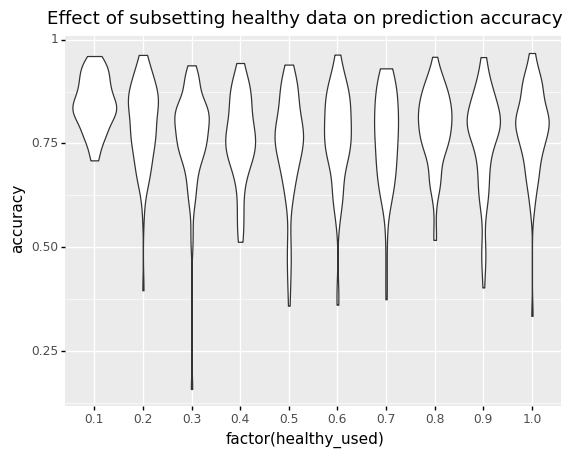

<ggplot: (8737375608670)>


In [35]:
plot = ggplot(sepsis_metrics, aes(x='factor(healthy_used)', y='accuracy', )) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


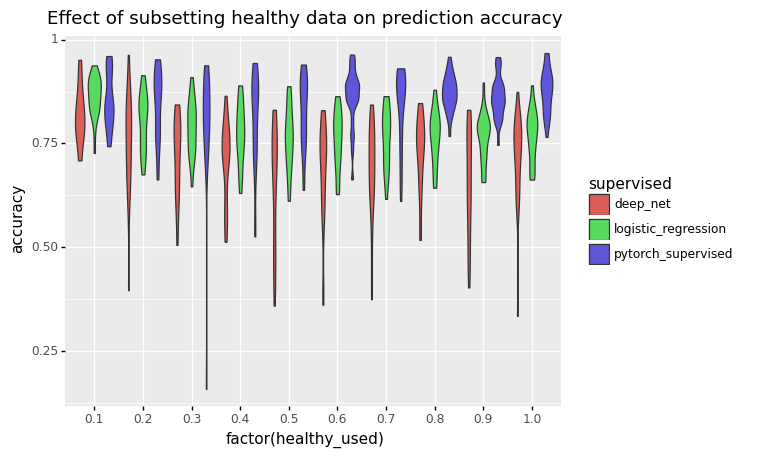

<ggplot: (8737375570893)>


In [36]:
plot = ggplot(sepsis_metrics, aes(x='factor(healthy_used)', y='accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

## TB Batch effect corrected

In [37]:
in_files = glob.glob('../../results/subset_label.tb*be_corrected.tsv')
print(in_files[:5])

['../../results/subset_label.tb.pytorch_supervised.refinebio_labeled_dataset.4.be_corrected.tsv', '../../results/subset_label.tb.logistic_regression.refinebio_labeled_dataset.0.be_corrected.tsv', '../../results/subset_label.tb.deep_net.refinebio_labeled_dataset.4.be_corrected.tsv', '../../results/subset_label.tb.logistic_regression.refinebio_labeled_dataset.2.be_corrected.tsv', '../../results/subset_label.tb.logistic_regression.refinebio_labeled_dataset.4.be_corrected.tsv']


In [38]:
tuberculosis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('tb.')[-1]
    model_info = model_info.split('.')
        
    supervised_model = model_info[0]
             
    new_df['supervised'] = supervised_model
        
    tuberculosis_metrics = pd.concat([tuberculosis_metrics, new_df])
    
tuberculosis_metrics = tuberculosis_metrics.rename({'fraction of healthy used': 'healthy_used'}, axis='columns')
tuberculosis_metrics['healthy_used'] = tuberculosis_metrics['healthy_used'].round(1)
tuberculosis_metrics

,accuracy,train studies,train sample count,healthy_used,supervised
0,0.762963,"GSE40553,GSE64338,GSE40240,GSE58411,GSE61635,S...",809,0.1,pytorch_supervised
1,0.682635,"GSE40553,GSE64338,GSE40240,GSE58411,GSE3037,GS...",959,0.2,pytorch_supervised
2,0.763819,"GSE40553,GSE64338,GSE40240,GSE58411,GSE3037,GS...",1109,0.3,pytorch_supervised
3,0.740260,"GSE40553,GSE64338,GSE40240,GSE58411,GSE3037,GS...",1259,0.4,pytorch_supervised
4,0.452471,"GSE40553,GSE64338,GSE40240,GSE58411,GSE3037,GS...",1409,0.5,pytorch_supervised
...,...,...,...,...,...
45,0.553991,"SRP077975,GSE14882,GSE3037,GSE40553,GSE33341,G...",1640,0.6,deep_net
46,0.836134,"SRP077975,GSE14882,GSE3037,GSE40553,GSE33341,G...",1798,0.7,deep_net
47,0.778626,"SRP077975,GSE14882,GSE3037,GSE40553,GSE33341,G...",1956,0.8,deep_net
48,0.860140,"SRP077975,GSE14882,GSE3037,GSE40553,GSE33341,G...",2114,0.9,deep_net


/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


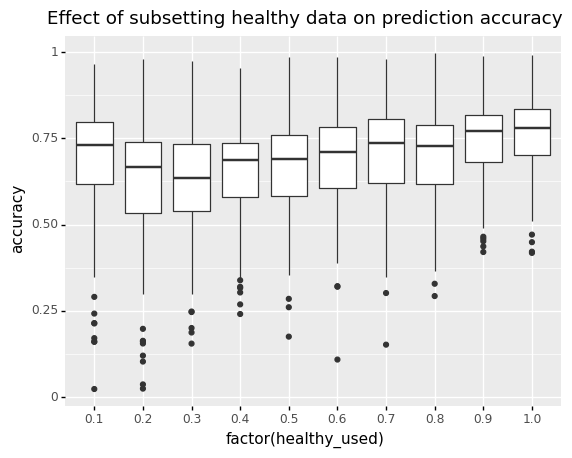

<ggplot: (8737375609613)>


In [39]:
plot = ggplot(tuberculosis_metrics, aes(x='factor(healthy_used)', y='accuracy')) 
plot += geom_boxplot()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


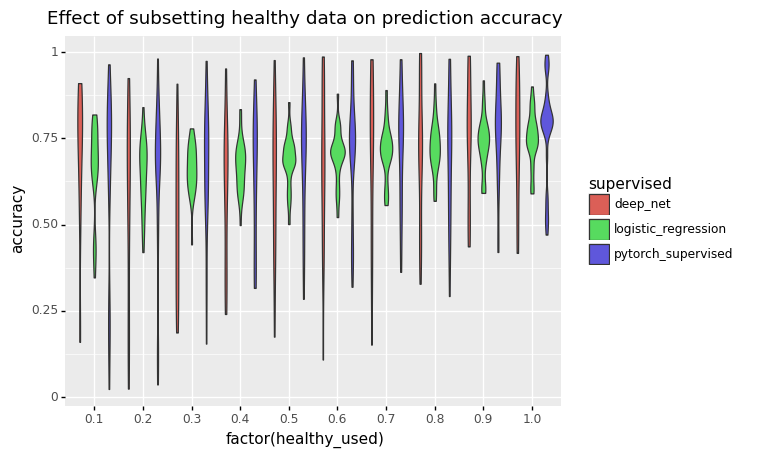

<ggplot: (8737375335723)>


In [40]:
plot = ggplot(tuberculosis_metrics, aes(x='factor(healthy_used)', y='accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

## Better Metrics, Same Label Distribution in Train and Val sets

In [11]:
in_files = glob.glob('../../results/keep_ratios.sepsis*be_corrected.tsv')
print(in_files[:5])

['../../results/keep_ratios.sepsis.pytorch_supervised.refinebio_labeled_dataset.2.be_corrected.tsv', '../../results/keep_ratios.sepsis.logistic_regression.refinebio_labeled_dataset.0.be_corrected.tsv', '../../results/keep_ratios.sepsis.pytorch_supervised.refinebio_labeled_dataset.1.be_corrected.tsv', '../../results/keep_ratios.sepsis.logistic_regression.refinebio_labeled_dataset.1.be_corrected.tsv', '../../results/keep_ratios.sepsis.deep_net.refinebio_labeled_dataset.1.be_corrected.tsv']


In [12]:
sepsis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('sepsis.')[-1]
    model_info = model_info.split('.')
        
    supervised_model = model_info[0]
             
    new_df['supervised'] = supervised_model
    
    new_df['seed'] = model_info[-2]
        
    sepsis_metrics = pd.concat([sepsis_metrics, new_df])
    
sepsis_metrics = sepsis_metrics.rename({'fraction of data used': 'healthy_used'}, axis='columns')
sepsis_metrics['healthy_used'] = sepsis_metrics['healthy_used'].round(1)

# Looking at the training curves, deep_net isn't actually training
# I need to fix it going forward, but for now I can clean up the visualizations by removing it
sepsis_metrics = sepsis_metrics[~(sepsis_metrics['supervised'] == 'deep_net')]
sepsis_metrics['supervised'] = sepsis_metrics['supervised'].str.replace('pytorch_supervised', 'three_layer_net')
sepsis_metrics

,accuracy,balanced_accuracy,f1_score,train studies,train samples,val samples,train sample count,healthy_used,supervised,seed
0,0.837838,0.839399,0.870334,"GSE25504,GSE4607,GSE9960,GSE55201,GSE10474,GSE...","SRR6710049,GSM2612122,GSM2631073,GSM2630917,GS...","GSM126988,GSM126993,GSM1568749,GSM1568751,GSM1...",116,0.1,three_layer_net,2
1,0.836609,0.847534,0.866332,"GSE25504,GSE4607,GSE93272,GSE9960,GSE55201,SRP...","SRR6710049,GSM2612122,GSM2631073,GSM2630917,GS...","GSM126988,GSM126993,GSM1568749,GSM1568751,GSM1...",233,0.2,three_layer_net,2
2,0.880835,0.866579,0.909091,"GSE25504,GSE4607,GSE93272,GSE9960,GSE55201,SRP...","SRR6710049,GSM2612122,GSM2631073,GSM2630917,GS...","GSM126988,GSM126993,GSM1568749,GSM1568751,GSM1...",350,0.3,three_layer_net,2
3,0.894349,0.869511,0.921533,"GSE98583,GSE25504,GSE4607,GSE93272,GSE9960,GSE...","SRR6710049,GSM2612122,GSM2631073,GSM2630917,GS...","GSM126988,GSM126993,GSM1568749,GSM1568751,GSM1...",467,0.4,three_layer_net,2
4,0.904177,0.871268,0.930233,"GSE98583,GSE25504,GSE4607,GSE93272,GSE9960,GSE...","SRR6710049,GSM2612122,GSM2631073,GSM2630917,GS...","GSM126988,GSM126993,GSM1568749,GSM1568751,GSM1...",584,0.5,three_layer_net,2
...,...,...,...,...,...,...,...,...,...,...
45,0.866242,0.824649,0.770909,"GSE14844,SRP077975,GSE14882,GSE37171,E-MEXP-16...","GSM938857,SRR3745159,GSM1108162,SRR3235898,GSM...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",1315,0.6,three_layer_net,0
46,0.847134,0.787236,0.720930,"GSE14844,SRP077975,GSE14882,GSE37171,E-MEXP-16...","GSM938857,SRR3745159,GSM1108162,SRR3235898,GSM...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",1534,0.7,three_layer_net,0
47,0.847134,0.816082,0.751724,"GSE14844,SRP077975,GSE14882,GSE37171,E-MEXP-16...","GSM938857,SRR3745159,GSM1108162,SRR3235898,GSM...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",1753,0.8,three_layer_net,0
48,0.842887,0.771510,0.699187,"GSE14844,SRP077975,GSE14882,GSE37171,E-MEXP-16...","GSM938857,SRR3745159,GSM1108162,SRR3235898,GSM...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",1972,0.9,three_layer_net,0


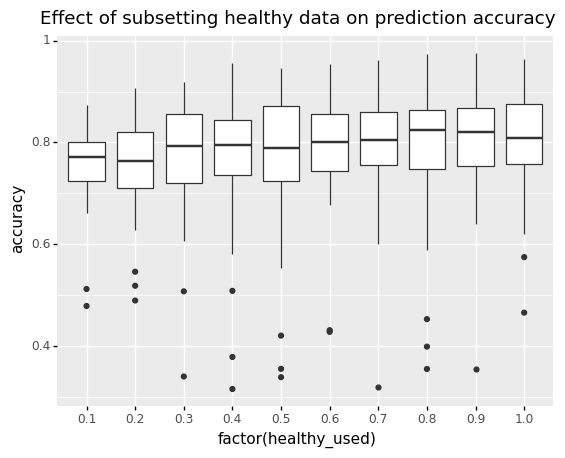

<ggplot: (8743782835393)>


In [13]:
plot = ggplot(sepsis_metrics, aes(x='factor(healthy_used)', y='accuracy')) 
plot += geom_boxplot()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

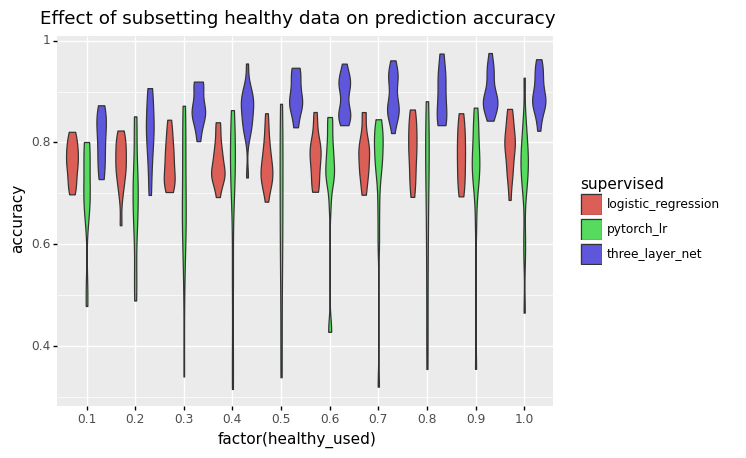

<ggplot: (8743784433557)>


In [14]:
plot = ggplot(sepsis_metrics, aes(x='factor(healthy_used)', y='accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

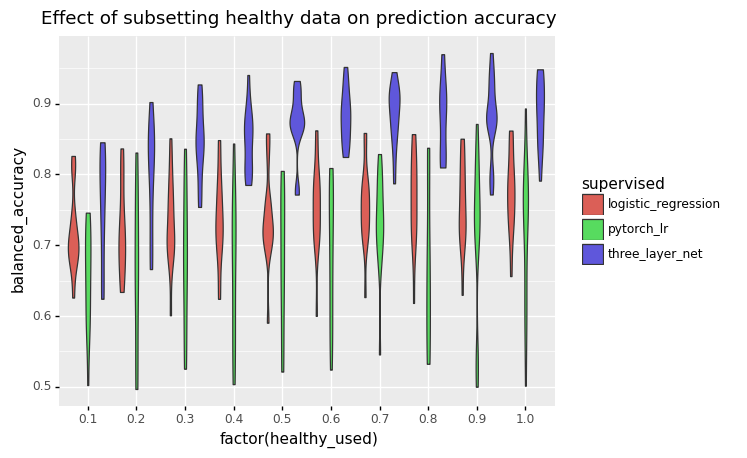

<ggplot: (8743782553353)>


In [15]:
plot = ggplot(sepsis_metrics, aes(x='factor(healthy_used)', y='balanced_accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

In [16]:
sepsis_stat_df = create_dataset_stat_df(sepsis_metrics, 
                                        sample_to_study, 
                                        sample_metadata, 
                                        sample_to_label,
                                        'sepsis')

sepsis_stat_df.tail(5)

,train_disease_count,train_healthy_count,val_disease_count,val_healthy_count,accuracy,balanced_accuracy,subset_fraction,seed,model,train_disease_percent,val_disease_percent,train_val_diff,train_count
445,415,900,149,322,0.866242,0.824649,0.6,0,three_layer_net,0.315589,0.316348,0.000759,1315
446,476,1058,149,322,0.847134,0.787236,0.7,0,three_layer_net,0.310300,0.316348,0.006048,1534
447,544,1209,149,322,0.847134,0.816082,0.8,0,three_layer_net,0.310325,0.316348,0.006023,1753
448,612,1360,149,322,0.842887,0.771510,0.9,0,three_layer_net,0.310345,0.316348,0.006003,1972
449,693,1499,149,322,0.874735,0.848889,1.0,0,three_layer_net,0.316150,0.316348,0.000199,2192


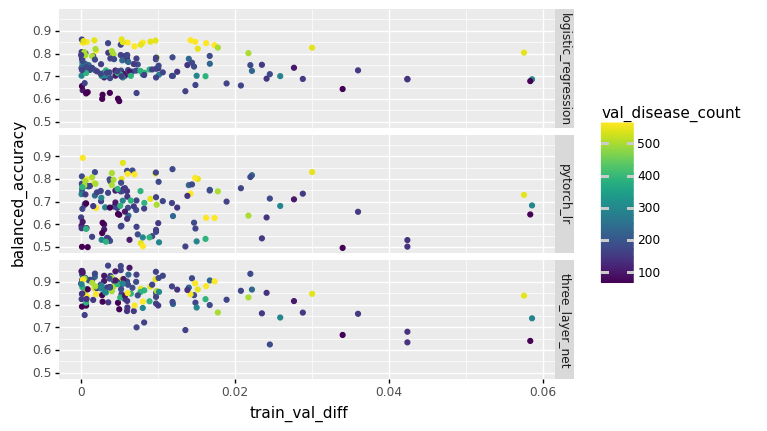

<ggplot: (8743782406893)>

In [17]:
ggplot(sepsis_stat_df, aes(x='train_val_diff', 
                           y='balanced_accuracy', 
                           color='val_disease_count')) + geom_point() + facet_grid('model ~ .')

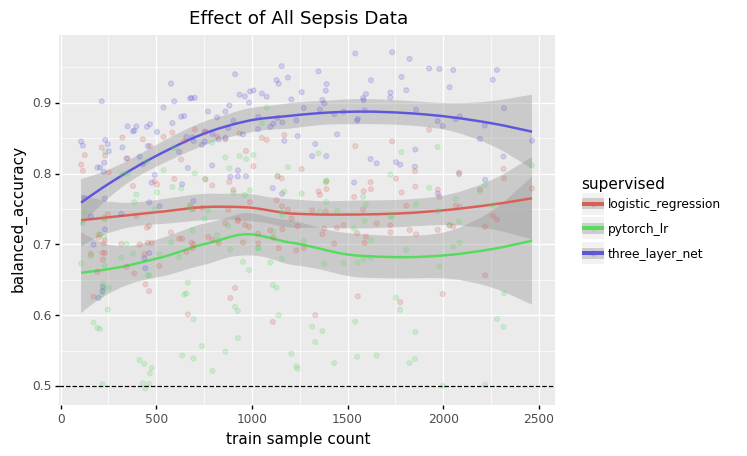

<ggplot: (8743782547341)>

In [18]:
plot = ggplot(sepsis_metrics, aes(x='train sample count', y='balanced_accuracy', color='supervised')) 
plot += geom_smooth()
plot += geom_point(alpha=.2)
plot += geom_hline(yintercept=.5, linetype='dashed')
plot += ggtitle('Effect of All Sepsis Data')
plot

## Same Distribution Tuberculosis

In [19]:
in_files = glob.glob('../../results/keep_ratios.tb*be_corrected.tsv')
print(in_files[:5])

['../../results/keep_ratios.tb.pytorch_lr.refinebio_labeled_dataset.0.be_corrected.tsv', '../../results/keep_ratios.tb.logistic_regression.refinebio_labeled_dataset.1.be_corrected.tsv', '../../results/keep_ratios.tb.pytorch_supervised.refinebio_labeled_dataset.1.be_corrected.tsv', '../../results/keep_ratios.tb.pytorch_supervised.refinebio_labeled_dataset.0.be_corrected.tsv', '../../results/keep_ratios.tb.deep_net.refinebio_labeled_dataset.0.be_corrected.tsv']


In [20]:
tb_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('tb.')[-1]
    model_info = model_info.split('.')
        
    supervised_model = model_info[0]
             
    new_df['supervised'] = supervised_model
    
    new_df['seed'] = model_info[-2]
        
    tb_metrics = pd.concat([tb_metrics, new_df])
    
tb_metrics = tb_metrics.rename({'fraction of data used': 'healthy_used'}, axis='columns')
tb_metrics['healthy_used'] = tb_metrics['healthy_used'].round(1)
tb_metrics

,accuracy,balanced_accuracy,f1_score,train studies,train samples,val samples,train sample count,healthy_used,supervised,seed
0,0.663683,0.692062,0.642177,"GSE40553,SRP071965,GSE65682,GSE99039,E-MEXP-16...","GSM777379,GSM996438,SRR3745139,GSM1892930,GSM2...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",52,0.1,pytorch_lr,0
1,0.734015,0.707336,0.792000,"SRP071965,GSE65682,E-MEXP-1635,GSE51808,SRP136...","GSM777379,GSM996438,SRR3745139,GSM1892930,GSM2...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",105,0.2,pytorch_lr,0
2,0.753197,0.742746,0.791802,"SRP071965,GSE65682,E-MEXP-1635,GSE51808,SRP136...","GSM777379,GSM996438,SRR3745139,GSM1892930,GSM2...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",158,0.3,pytorch_lr,0
3,0.609974,0.657523,0.522692,"SRP071965,GSE65682,E-MEXP-1635,GSE51808,SRP136...","GSM777379,GSM996438,SRR3745139,GSM1892930,GSM2...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",210,0.4,pytorch_lr,0
4,0.764706,0.762530,0.793258,"GSE13904,SRP071965,GSE65682,E-MEXP-1635,GSE518...","GSM777379,GSM996438,SRR3745139,GSM1892930,GSM2...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",263,0.5,pytorch_lr,0
...,...,...,...,...,...,...,...,...,...,...
45,0.790997,0.522059,0.084507,"GSE3284,SRP071965,SRP092402,GSE38511,GSE26378,...","GSM955687,SRR3236060,SRR6870382,GSM830222,SRR3...","GSM1225041,GSM1225042,GSM1225043,GSM1225044,GS...",1211,0.6,pytorch_lr,2
46,0.790997,0.522059,0.084507,"GSE3284,SRP071965,SRP092402,GSE38511,GSE26378,...","GSM955687,SRR3236060,SRR6870382,GSM830222,SRR3...","GSM1225041,GSM1225042,GSM1225043,GSM1225044,GS...",1413,0.7,pytorch_lr,2
47,0.781350,0.500000,0.000000,"GSE3284,SRP071965,SRP092402,GSE38511,GSE26378,...","GSM955687,SRR3236060,SRR6870382,GSM830222,SRR3...","GSM1225041,GSM1225042,GSM1225043,GSM1225044,GS...",1615,0.8,pytorch_lr,2
48,0.784566,0.507353,0.028986,"GSE3284,SRP071965,SRP092402,GSE38511,GSE26378,...","GSM955687,SRR3236060,SRR6870382,GSM830222,SRR3...","GSM1225041,GSM1225042,GSM1225043,GSM1225044,GS...",1817,0.9,pytorch_lr,2


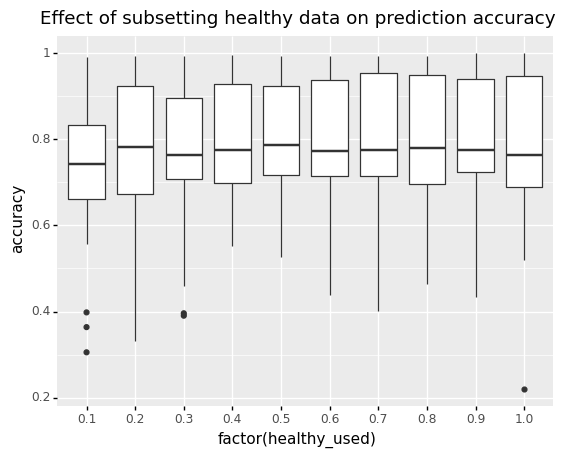

<ggplot: (8743782379613)>


In [21]:
plot = ggplot(tb_metrics, aes(x='factor(healthy_used)', y='accuracy')) 
plot += geom_boxplot()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

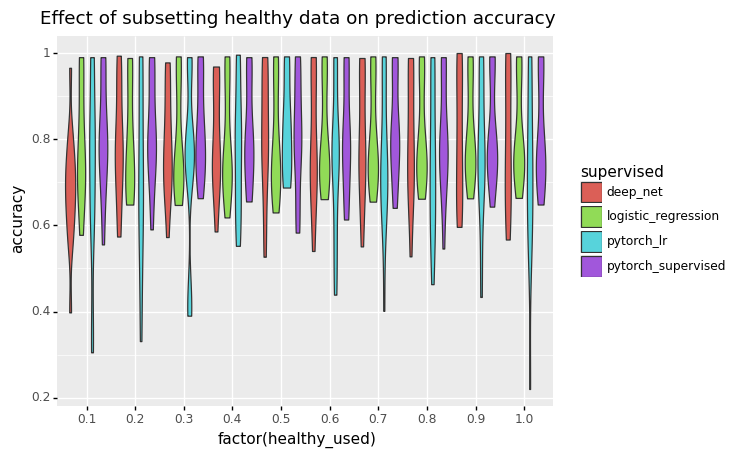

<ggplot: (8743782392289)>


In [22]:
plot = ggplot(tb_metrics, aes(x='factor(healthy_used)', y='accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

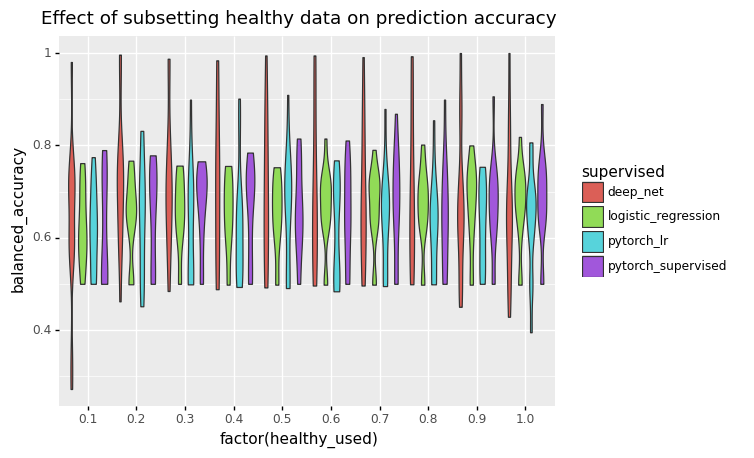

<ggplot: (8743782009125)>


In [23]:
plot = ggplot(tb_metrics, aes(x='factor(healthy_used)', y='balanced_accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

In [24]:
tb_stat_df = create_dataset_stat_df(tb_metrics, 
                                    sample_to_study, 
                                    sample_metadata, 
                                    sample_to_label,
                                    'tb')

tb_stat_df.tail(5)

,train_disease_count,train_healthy_count,val_disease_count,val_healthy_count,accuracy,balanced_accuracy,subset_fraction,seed,model,train_disease_percent,val_disease_percent,train_val_diff,train_count
555,287,924,68,243,0.790997,0.522059,0.6,2,pytorch_lr,0.236994,0.21865,0.018345,1211
556,320,1093,68,243,0.790997,0.522059,0.7,2,pytorch_lr,0.226469,0.21865,0.007819,1413
557,354,1261,68,243,0.781350,0.500000,0.8,2,pytorch_lr,0.219195,0.21865,0.000546,1615
558,393,1424,68,243,0.784566,0.507353,0.9,2,pytorch_lr,0.216291,0.21865,0.002359,1817
559,441,1578,68,243,0.858521,0.697652,1.0,2,pytorch_lr,0.218425,0.21865,0.000225,2019


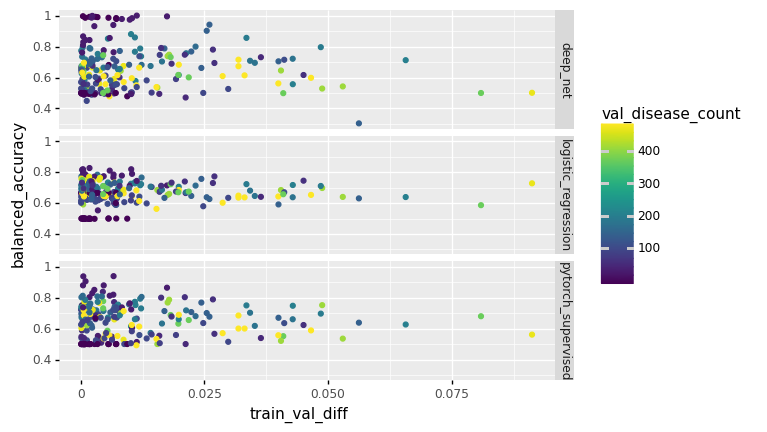

<ggplot: (8737355302521)>

In [55]:
ggplot(tb_stat_df, aes(x='train_val_diff', 
                       y='balanced_accuracy', 
                       color='val_disease_count')) + geom_point() + facet_grid('model ~ .')

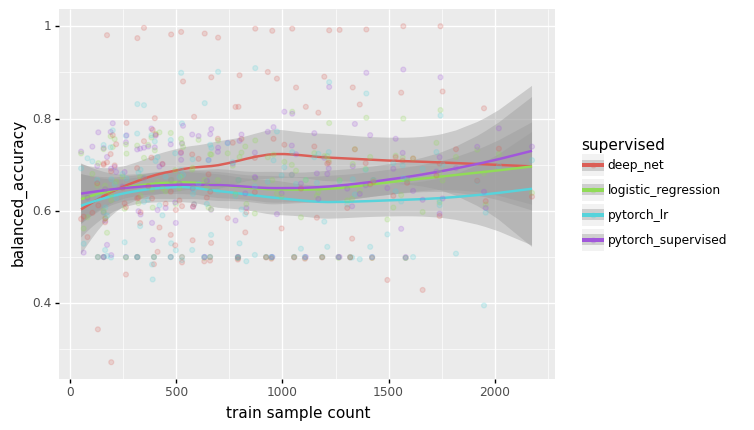

<ggplot: (8743781911269)>

In [25]:
plot = ggplot(tb_metrics, aes(x='train sample count', y='balanced_accuracy', color='supervised')) 
plot += geom_smooth()
plot += geom_point(alpha=.2)
plot

## Results from Small Datasets

In [57]:
in_files = glob.glob('../../results/small_subsets.sepsis*be_corrected.tsv')
print(in_files[:5])

['../../results/small_subsets.sepsis.pytorch_supervised.refinebio_labeled_dataset.0.be_corrected.tsv', '../../results/small_subsets.sepsis.deep_net.refinebio_labeled_dataset.4.be_corrected.tsv', '../../results/small_subsets.sepsis.pytorch_supervised.refinebio_labeled_dataset.1.be_corrected.tsv', '../../results/small_subsets.sepsis.logistic_regression.refinebio_labeled_dataset.0.be_corrected.tsv', '../../results/small_subsets.sepsis.logistic_regression.refinebio_labeled_dataset.2.be_corrected.tsv']


In [58]:
sepsis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('sepsis.')[-1]
    model_info = model_info.split('.')
        
    supervised_model = model_info[0]
             
    new_df['supervised'] = supervised_model
    
    new_df['seed'] = model_info[-2]
        
    sepsis_metrics = pd.concat([sepsis_metrics, new_df])
    
sepsis_metrics['train_count'] = sepsis_metrics['train sample count']

# Looking at the training curves, deep_net isn't actually training
# I need to fix it going forward, but for now I can clean up the visualizations by removing it
sepsis_metrics = sepsis_metrics[~(sepsis_metrics['supervised'] == 'deep_net')]
sepsis_metrics['supervised'] = sepsis_metrics['supervised'].str.replace('pytorch_supervised', 'three_layer_net')
sepsis_metrics

,accuracy,balanced_accuracy,f1_score,train studies,train samples,val samples,train sample count,supervised,seed,train_count
0,0.484043,0.484043,0.645985,"GSE99039,GSE9960,GSE21592,GSE84844,SRP071965,G...","GSM350295,GSM648592,GSM365207,GSM251991,GSM157...","GSM201245,GSM201247,GSM201248,GSM201249,GSM201...",20,three_layer_net,0,20
1,0.694149,0.694149,0.622951,"GSE99039,GSE9960,GSE64457,GSE95233,SRP071965,G...","GSM350295,GSM648592,GSM365207,GSM251991,GSM157...","GSM201245,GSM201247,GSM201248,GSM201249,GSM201...",40,three_layer_net,0,40
2,0.744681,0.744681,0.755102,"GSE38511,GSE99039,GSE9960,GSE64457,GSE95233,SR...","GSM350295,GSM648592,GSM365207,GSM251991,GSM157...","GSM201245,GSM201247,GSM201248,GSM201249,GSM201...",60,three_layer_net,0,60
3,0.755319,0.755319,0.693333,"GSE38511,GSE99039,GSE9960,GSE83456,GSE64457,GS...","GSM350295,GSM648592,GSM365207,GSM251991,GSM157...","GSM201245,GSM201247,GSM201248,GSM201249,GSM201...",80,three_layer_net,0,80
4,0.659574,0.659574,0.740891,"GSE38511,GSE99039,GSE9960,GSE83456,GSE64457,GS...","GSM350295,GSM648592,GSM365207,GSM251991,GSM157...","GSM201245,GSM201247,GSM201248,GSM201249,GSM201...",100,three_layer_net,0,100
...,...,...,...,...,...,...,...,...,...,...
90,0.672222,0.672222,0.595890,"GSE45923,GSE99039,GSE33341,GSE28750,GSE11909,G...","GSM350256,GSM648619,GSM647541,GSM1586963,GSM16...","GSM1571528,GSM1571529,GSM1571530,GSM1571531,GS...",300,logistic_regression,4,300
91,0.686111,0.686111,0.622074,"GSE45923,GSE99039,GSE33341,GSE28750,GSE11909,G...","GSM350256,GSM648619,GSM647541,GSM1586963,GSM16...","GSM1571528,GSM1571529,GSM1571530,GSM1571531,GS...",320,logistic_regression,4,320
92,0.672222,0.672222,0.604027,"GSE45923,GSE99039,GSE33341,GSE28750,GSE11909,G...","GSM350256,GSM648619,GSM647541,GSM1586963,GSM16...","GSM1571528,GSM1571529,GSM1571530,GSM1571531,GS...",340,logistic_regression,4,340
93,0.680556,0.680556,0.620462,"GSE45923,GSE99039,GSE33341,GSE28750,GSE11909,G...","GSM350256,GSM648619,GSM647541,GSM1586963,GSM16...","GSM1571528,GSM1571529,GSM1571530,GSM1571531,GS...",360,logistic_regression,4,360


/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


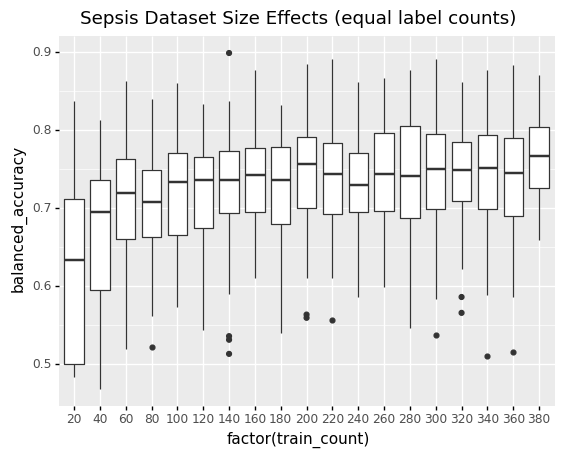

<ggplot: (8737355186285)>


In [59]:
plot = ggplot(sepsis_metrics, aes(x='factor(train_count)', y='balanced_accuracy')) 
plot += geom_boxplot()
plot += ggtitle('Sepsis Dataset Size Effects (equal label counts)')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


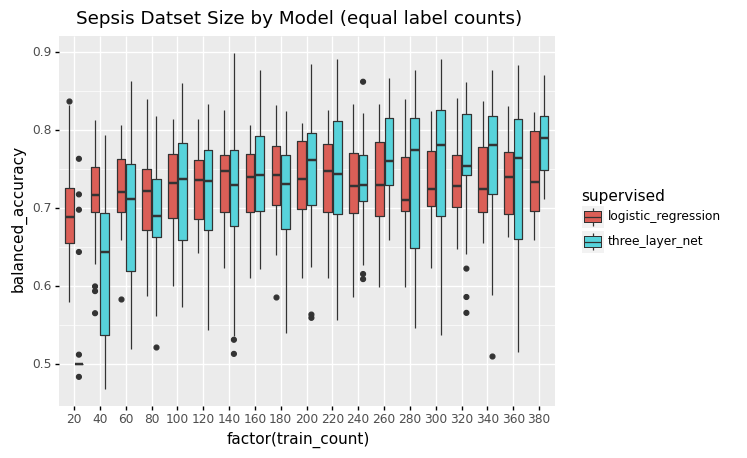

<ggplot: (8737355242599)>


In [60]:
plot = ggplot(sepsis_metrics, aes(x='factor(train_count)', y='balanced_accuracy', fill='supervised')) 
plot += geom_boxplot()
plot += ggtitle('Sepsis Datset Size by Model (equal label counts)')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


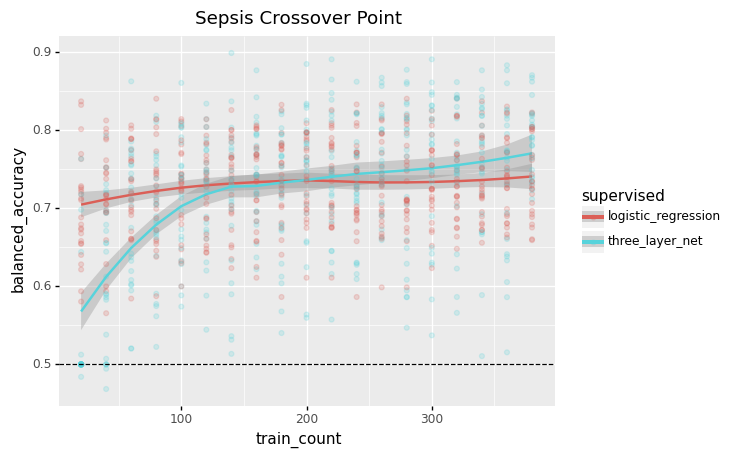

<ggplot: (8737354843847)>

In [61]:
plot = ggplot(sepsis_metrics, aes(x='train_count', y='balanced_accuracy', color='supervised')) 
plot += geom_smooth()
plot += geom_point(alpha=.2)
plot += geom_hline(yintercept=.5, linetype='dashed')
plot += ggtitle('Sepsis Crossover Point')
plot

## Small Training Set TB

In [62]:
in_files = glob.glob('../../results/small_subsets.tb*be_corrected.tsv')
print(in_files[:5])

['../../results/small_subsets.tb.deep_net.refinebio_labeled_dataset.2.be_corrected.tsv', '../../results/small_subsets.tb.pytorch_supervised.refinebio_labeled_dataset.1.be_corrected.tsv', '../../results/small_subsets.tb.pytorch_supervised.refinebio_labeled_dataset.2.be_corrected.tsv', '../../results/small_subsets.tb.deep_net.refinebio_labeled_dataset.4.be_corrected.tsv', '../../results/small_subsets.tb.deep_net.refinebio_labeled_dataset.3.be_corrected.tsv']


In [63]:
tb_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('tb.')[-1]
    model_info = model_info.split('.')
        
    supervised_model = model_info[0]
             
    new_df['supervised'] = supervised_model
    
    new_df['seed'] = model_info[-2]
        
    tb_metrics = pd.concat([tb_metrics, new_df])
    
tb_metrics['train_count'] = tb_metrics['train sample count']

# Looking at the training curves, deep_net isn't actually training
# I need to fix it going forward, but for now I can clean up the visualizations by removing it
tb_metrics = tb_metrics[~(tb_metrics['supervised'] == 'deep_net')]
tb_metrics['supervised'] = tb_metrics['supervised'].str.replace('pytorch_supervised', 'three_layer_net')
tb_metrics

,accuracy,balanced_accuracy,f1_score,train studies,train samples,val samples,train sample count,supervised,seed,train_count
0,0.604895,0.604895,0.368715,"GSE99039,SRP092402,GSE73408,GSE19491,SRP071965...","GSM484628,SRR4785064,GSM1892936,SRR4784236,GSM...","GSM2203540,GSM2203541,GSM2203542,GSM2203543,GS...",20,three_layer_net,1,20
1,0.636364,0.636364,0.440860,"GSE99039,GSE95233,E-MEXP-1635,SRP092402,GSE734...","GSM484628,SRR4785064,GSM1892936,SRR4784236,GSM...","GSM2203540,GSM2203541,GSM2203542,GSM2203543,GS...",40,three_layer_net,1,40
2,0.548951,0.548951,0.652291,"GSE99039,GSE95233,E-MEXP-1635,SRP092402,GSE734...","GSM484628,SRR4785064,GSM1892936,SRR4784236,GSM...","GSM2203540,GSM2203541,GSM2203542,GSM2203543,GS...",60,three_layer_net,1,60
3,0.590909,0.590909,0.670423,"GSE99039,GSE73408,GSE3037,GSE19491,GSE39088,GS...","GSM484628,SRR4785064,GSM1892936,SRR4784236,GSM...","GSM2203540,GSM2203541,GSM2203542,GSM2203543,GS...",80,three_layer_net,1,80
4,0.688811,0.688811,0.565854,"GSE99039,GSE73408,GSE3037,GSE19491,GSE39088,GS...","GSM484628,SRR4785064,GSM1892936,SRR4784236,GSM...","GSM2203540,GSM2203541,GSM2203542,GSM2203543,GS...",100,three_layer_net,1,100
...,...,...,...,...,...,...,...,...,...,...
71,0.584270,0.584270,0.288462,"GSE21592,GSE14844,GSE9960,GSE38511,SRP071965,G...","SRR4784509,GSM484573,GSM2203688,SRR4784278,SRR...","GSM1050948,GSM1050971,GSM1050988,GSM1892913,GS...",300,three_layer_net,3,300
72,0.539326,0.539326,0.145833,"GSE21592,GSE14844,GSE9960,GSE38511,GSE5504,SRP...","SRR4784509,GSM484573,GSM2203688,SRR4784278,SRR...","GSM1050948,GSM1050971,GSM1050988,GSM1892913,GS...",320,three_layer_net,3,320
73,0.691011,0.691011,0.763948,"GSE21592,GSE14844,GSE9960,GSE38511,GSE5504,SRP...","SRR4784509,GSM484573,GSM2203688,SRR4784278,SRR...","GSM1050948,GSM1050971,GSM1050988,GSM1892913,GS...",340,three_layer_net,3,340
74,0.747191,0.747191,0.693878,"GSE21592,GSE14844,GSE9960,GSE38511,GSE5504,SRP...","SRR4784509,GSM484573,GSM2203688,SRR4784278,SRR...","GSM1050948,GSM1050971,GSM1050988,GSM1892913,GS...",360,three_layer_net,3,360


/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


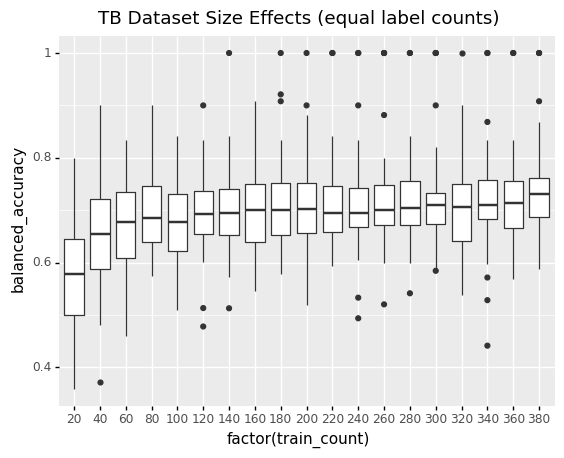

<ggplot: (8737354872519)>


In [64]:
plot = ggplot(tb_metrics, aes(x='factor(train_count)', y='balanced_accuracy')) 
plot += geom_boxplot()
plot += ggtitle('TB Dataset Size Effects (equal label counts)')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


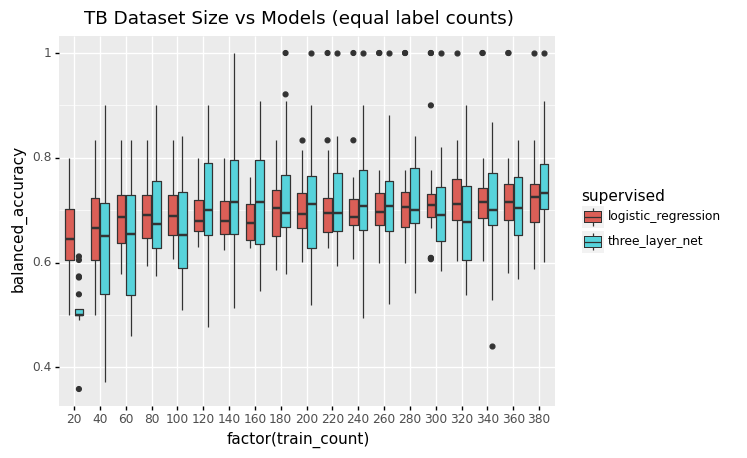

<ggplot: (8737354851247)>


In [65]:
plot = ggplot(tb_metrics, aes(x='factor(train_count)', y='balanced_accuracy', fill='supervised')) 
plot += geom_boxplot()
plot += ggtitle('TB Dataset Size vs Models (equal label counts)')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


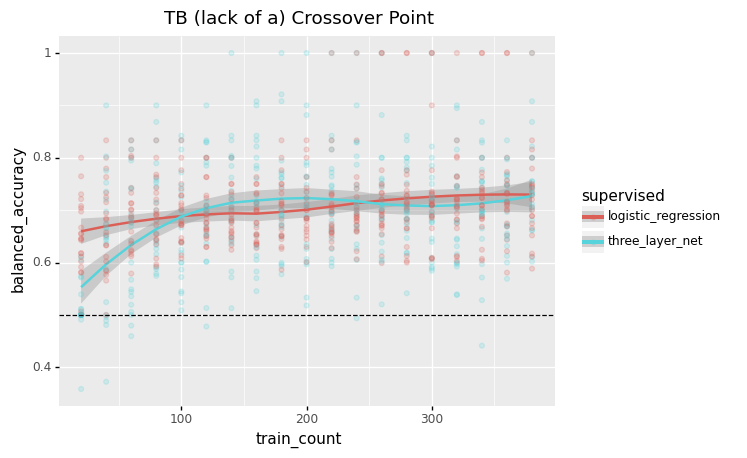

<ggplot: (8737354863086)>

In [66]:
plot = ggplot(tb_metrics, aes(x='train_count', y='balanced_accuracy', color='supervised')) 
plot += geom_smooth(method='loess')
plot += geom_point(alpha=.2)
plot += geom_hline(yintercept=.5, linetype='dashed')
plot += ggtitle('TB (lack of a) Crossover Point')
plot

## Small training sets without be correction

In [67]:
in_files = glob.glob('../../results/small_subsets.sepsis*.tsv')
in_files = [file for file in in_files if 'be_corrected' not in file]
print(in_files[:5])

['../../results/small_subsets.sepsis.logistic_regression.refinebio_labeled_dataset.3.tsv', '../../results/small_subsets.sepsis.deep_net.refinebio_labeled_dataset.2.tsv', '../../results/small_subsets.sepsis.deep_net.refinebio_labeled_dataset.4.tsv', '../../results/small_subsets.sepsis.pytorch_supervised.refinebio_labeled_dataset.3.tsv', '../../results/small_subsets.sepsis.logistic_regression.refinebio_labeled_dataset.2.tsv']


In [68]:
sepsis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('sepsis.')[-1]
    model_info = model_info.split('.')
        
    supervised_model = model_info[0]
             
    new_df['supervised'] = supervised_model
    
    new_df['seed'] = model_info[-2]
        
    sepsis_metrics = pd.concat([sepsis_metrics, new_df])
    
sepsis_metrics['train_count'] = sepsis_metrics['train sample count']

# Looking at the training curves, deep_net isn't actually training
# I need to fix it going forward, but for now I can clean up the visualizations by removing it
sepsis_metrics = sepsis_metrics[~(sepsis_metrics['supervised'] == 'deep_net')]
sepsis_metrics['supervised'] = sepsis_metrics['supervised'].str.replace('pytorch_supervised', 'three_layer_net')
sepsis_metrics

,accuracy,balanced_accuracy,f1_score,train studies,train samples,val samples,train sample count,supervised,seed,train_count
0,0.881048,0.881048,0.888469,"GSE84844,GSE19491,GSE66099,GSE11755,GSE13904,G...","GSM264992,GSM1617681,GSM1586944,GSM350349,GSM1...","E-MEXP-1635-04SE57HA300104,E-MEXP-1635-04SE58H...",20,logistic_regression,refinebio_labeled_dataset,20
1,0.949597,0.949597,0.950298,"GSE40586,GSE33341,GSE84844,GSE57065,GSE13904,G...","GSM264992,GSM1617681,GSM1586944,GSM350349,GSM1...","E-MEXP-1635-04SE57HA300104,E-MEXP-1635-04SE58H...",40,logistic_regression,refinebio_labeled_dataset,40
2,0.951613,0.951613,0.953125,"GSE40586,GSE33341,GSE84844,GSE57065,GSE13904,G...","GSM264992,GSM1617681,GSM1586944,GSM350349,GSM1...","E-MEXP-1635-04SE57HA300104,E-MEXP-1635-04SE58H...",60,logistic_regression,refinebio_labeled_dataset,60
3,0.931452,0.931452,0.931452,"GSE40586,GSE33341,GSE84844,GSE57065,GSE13904,G...","GSM264992,GSM1617681,GSM1586944,GSM350349,GSM1...","E-MEXP-1635-04SE57HA300104,E-MEXP-1635-04SE58H...",80,logistic_regression,refinebio_labeled_dataset,80
4,0.955645,0.955645,0.956693,"GSE40586,GSE33341,GSE84844,GSE57065,SRP049820,...","GSM264992,GSM1617681,GSM1586944,GSM350349,GSM1...","E-MEXP-1635-04SE57HA300104,E-MEXP-1635-04SE58H...",100,logistic_regression,refinebio_labeled_dataset,100
...,...,...,...,...,...,...,...,...,...,...
90,0.932292,0.932292,0.930851,"GSE19491,GSE26049,SRP077975,GSE93606,GSE45923,...","GSM648655,GSM2500376,GSM251944,GSM350358,GSM35...","GSM1404211,GSM1404212,GSM1404219,GSM1404220,GS...",300,three_layer_net,refinebio_labeled_dataset,300
91,0.856771,0.856771,0.833837,"GSE19491,GSE26049,SRP077975,GSE93606,GSE45923,...","GSM648655,GSM2500376,GSM251944,GSM350358,GSM35...","GSM1404211,GSM1404212,GSM1404219,GSM1404220,GS...",320,three_layer_net,refinebio_labeled_dataset,320
92,0.819010,0.819010,0.789713,"GSE19491,GSE26049,SRP077975,GSE93606,GSE45923,...","GSM648655,GSM2500376,GSM251944,GSM350358,GSM35...","GSM1404211,GSM1404212,GSM1404219,GSM1404220,GS...",340,three_layer_net,refinebio_labeled_dataset,340
93,0.903646,0.903646,0.896067,"GSE19491,GSE26049,SRP077975,GSE93606,GSE45923,...","GSM648655,GSM2500376,GSM251944,GSM350358,GSM35...","GSM1404211,GSM1404212,GSM1404219,GSM1404220,GS...",360,three_layer_net,refinebio_labeled_dataset,360


/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


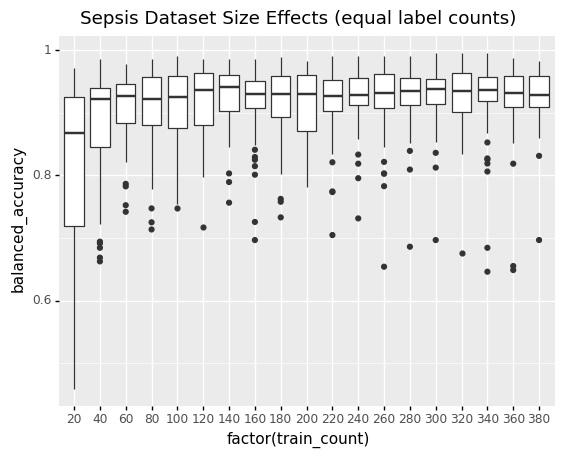

<ggplot: (8737390778709)>


In [69]:
plot = ggplot(sepsis_metrics, aes(x='factor(train_count)', y='balanced_accuracy')) 
plot += geom_boxplot()
plot += ggtitle('Sepsis Dataset Size Effects (equal label counts)')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


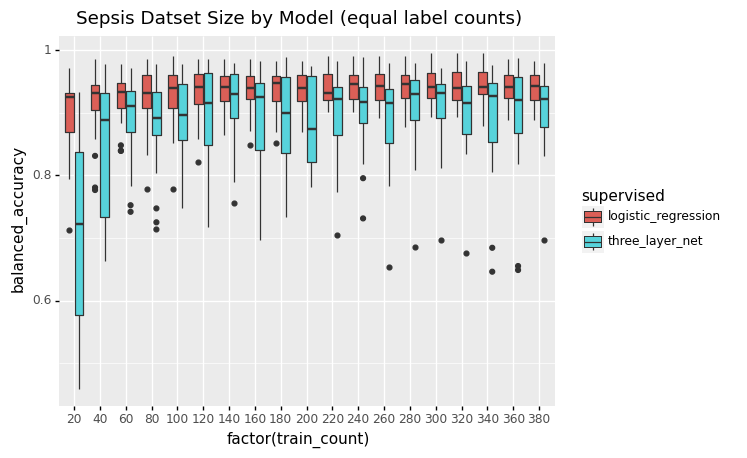

<ggplot: (8737375476962)>


In [70]:
plot = ggplot(sepsis_metrics, aes(x='factor(train_count)', y='balanced_accuracy', fill='supervised')) 
plot += geom_boxplot()
plot += ggtitle('Sepsis Datset Size by Model (equal label counts)')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


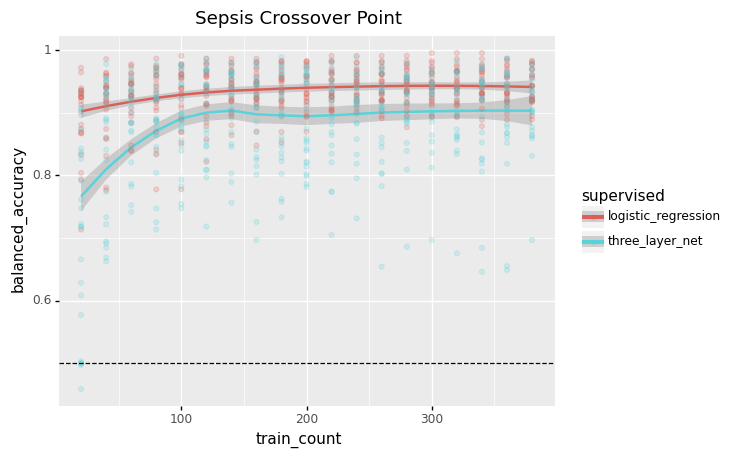

<ggplot: (8737375615645)>

In [71]:
plot = ggplot(sepsis_metrics, aes(x='train_count', y='balanced_accuracy', color='supervised')) 
plot += geom_smooth()
plot += geom_point(alpha=.2)
plot += geom_hline(yintercept=.5, linetype='dashed')
plot += ggtitle('Sepsis Crossover Point')
plot

## TB Not Batch Effect Corrected

In [72]:
in_files = glob.glob('../../results/small_subsets.tb*.tsv')
in_files = [file for file in in_files if 'be_corrected' not in file]
print(in_files[:5])

['../../results/small_subsets.tb.pytorch_supervised.refinebio_labeled_dataset.1.tsv', '../../results/small_subsets.tb.pytorch_supervised.refinebio_labeled_dataset.2.tsv', '../../results/small_subsets.tb.logistic_regression.refinebio_labeled_dataset.2.tsv', '../../results/small_subsets.tb.deep_net.refinebio_labeled_dataset.0.tsv', '../../results/small_subsets.tb.pytorch_supervised.refinebio_labeled_dataset.3.tsv']


In [73]:
tb_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('tb.')[-1]
    model_info = model_info.split('.')
        
    supervised_model = model_info[0]
             
    new_df['supervised'] = supervised_model
    
    new_df['seed'] = model_info[-2]
        
    tb_metrics = pd.concat([tb_metrics, new_df])
    
tb_metrics['train_count'] = tb_metrics['train sample count']

# Looking at the training curves, deep_net isn't actually training
# I need to fix it going forward, but for now I can clean up the visualizations by removing it
tb_metrics = tb_metrics[~(tb_metrics['supervised'] == 'deep_net')]
tb_metrics['supervised'] = tb_metrics['supervised'].str.replace('pytorch_supervised', 'three_layer_net')
tb_metrics

,accuracy,balanced_accuracy,f1_score,train studies,train samples,val samples,train sample count,supervised,seed,train_count
0,0.664336,0.664336,0.657143,"SRP071965,GSE73408,GSE98793,SRP136102,GSE93606...","GSM484628,SRR4785064,GSM1892936,SRR4784236,GSM...","GSM2203540,GSM2203541,GSM2203542,GSM2203543,GS...",20,three_layer_net,refinebio_labeled_dataset,20
1,0.681818,0.681818,0.669091,"E-MEXP-1635,SRP071965,GSE73408,GSE98793,SRP136...","GSM484628,SRR4785064,GSM1892936,SRR4784236,GSM...","GSM2203540,GSM2203541,GSM2203542,GSM2203543,GS...",40,three_layer_net,refinebio_labeled_dataset,40
2,0.681818,0.681818,0.669091,"E-MEXP-1635,SRP071965,GSE73408,GSE98793,SRP136...","GSM484628,SRR4785064,GSM1892936,SRR4784236,GSM...","GSM2203540,GSM2203541,GSM2203542,GSM2203543,GS...",60,three_layer_net,refinebio_labeled_dataset,60
3,0.660839,0.660839,0.654804,"GSE98793,SRP092402,GSE33341,GSE28750,GSE55201,...","GSM484628,SRR4785064,GSM1892936,SRR4784236,GSM...","GSM2203540,GSM2203541,GSM2203542,GSM2203543,GS...",80,three_layer_net,refinebio_labeled_dataset,80
4,0.657343,0.657343,0.652482,"GSE98793,SRP092402,GSE33341,GSE28750,GSE55201,...","GSM484628,SRR4785064,GSM1892936,SRR4784236,GSM...","GSM2203540,GSM2203541,GSM2203542,GSM2203543,GS...",100,three_layer_net,refinebio_labeled_dataset,100
...,...,...,...,...,...,...,...,...,...,...
90,0.500000,0.500000,0.000000,"GSE73408,GSE45291,GSE58411,SRP092402,GSE79150,...","SRR4785022,SRR4785088,GSM2203581,SRR4784602,GS...","SRR3745139,SRR3745147,SRR3745171,SRR3745172,SR...",300,logistic_regression,refinebio_labeled_dataset,300
91,0.500000,0.500000,0.000000,"GSE73408,GSE45291,GSE58411,SRP092402,GSE79150,...","SRR4785022,SRR4785088,GSM2203581,SRR4784602,GS...","SRR3745139,SRR3745147,SRR3745171,SRR3745172,SR...",320,logistic_regression,refinebio_labeled_dataset,320
92,0.500000,0.500000,0.000000,"GSE73408,GSE45291,GSE58411,SRP092402,GSE79150,...","SRR4785022,SRR4785088,GSM2203581,SRR4784602,GS...","SRR3745139,SRR3745147,SRR3745171,SRR3745172,SR...",340,logistic_regression,refinebio_labeled_dataset,340
93,0.500000,0.500000,0.000000,"GSE73408,GSE45291,GSE58411,SRP092402,GSE79150,...","SRR4785022,SRR4785088,GSM2203581,SRR4784602,GS...","SRR3745139,SRR3745147,SRR3745171,SRR3745172,SR...",360,logistic_regression,refinebio_labeled_dataset,360


/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


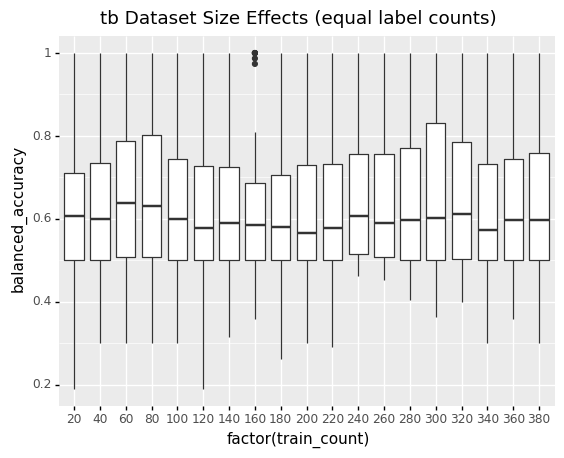

<ggplot: (8737354307669)>


In [74]:
plot = ggplot(tb_metrics, aes(x='factor(train_count)', y='balanced_accuracy')) 
plot += geom_boxplot()
plot += ggtitle('tb Dataset Size Effects (equal label counts)')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


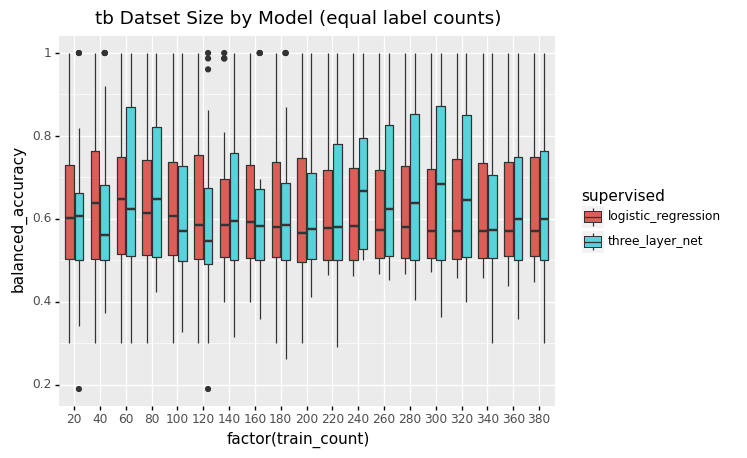

<ggplot: (8737354221240)>


In [75]:
plot = ggplot(tb_metrics, aes(x='factor(train_count)', y='balanced_accuracy', fill='supervised')) 
plot += geom_boxplot()
plot += ggtitle('tb Datset Size by Model (equal label counts)')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


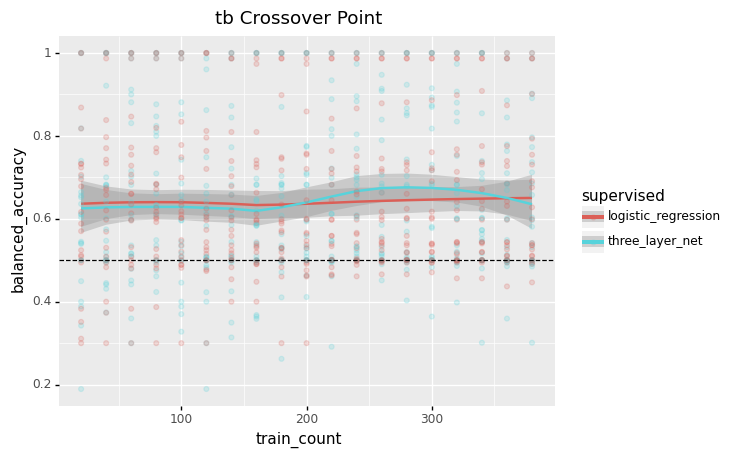

<ggplot: (8737354066679)>

In [76]:
plot = ggplot(tb_metrics, aes(x='train_count', y='balanced_accuracy', color='supervised')) 
plot += geom_smooth()
plot += geom_point(alpha=.2)
plot += geom_hline(yintercept=.5, linetype='dashed')
plot += ggtitle('tb Crossover Point')
plot

## Large training sets without be correction

In [6]:
in_files = glob.glob('../../results/keep_ratios.sepsis*.tsv')
in_files = [file for file in in_files if 'be_corrected' not in file]
print(in_files[:5])

['../../results/keep_ratios.sepsis.pytorch_lr.refinebio_labeled_dataset.1.tsv', '../../results/keep_ratios.sepsis.pytorch_supervised.refinebio_labeled_dataset.0.tsv', '../../results/keep_ratios.sepsis.pytorch_supervised.refinebio_labeled_dataset.2.tsv', '../../results/keep_ratios.sepsis.logistic_regression.refinebio_labeled_dataset.2.tsv', '../../results/keep_ratios.sepsis.pytorch_supervised.refinebio_labeled_dataset.1.tsv']


In [9]:
sepsis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('sepsis.')[-1]
    model_info = model_info.split('.')
        
    supervised_model = model_info[0]
             
    new_df['supervised'] = supervised_model
    
    new_df['seed'] = model_info[-2]
        
    sepsis_metrics = pd.concat([sepsis_metrics, new_df])
    
sepsis_metrics['train_count'] = sepsis_metrics['train sample count']

sepsis_metrics['supervised'] = sepsis_metrics['supervised'].str.replace('pytorch_supervised', 'three_layer_net')
sepsis_metrics

,accuracy,balanced_accuracy,f1_score,train studies,train samples,val samples,train sample count,fraction of data used,supervised,seed,train_count
0,0.932584,0.898876,0.874251,"GSE83456,SRP077975,GSE11909,GSE13904,GSE112811...","GSM2449616,GSM830222,GSM265033,GSM830186,GSM13...","GSM1050991,GSM1051012,GSM1051015,GSM1051020,GS...",192,0.1,pytorch_lr,refinebio_labeled_dataset,192
1,0.963082,0.947191,0.933718,"GSE83456,SRP077975,E-MEXP-3567,GSE11909,GSE255...","GSM2449616,GSM830222,GSM265033,GSM830186,GSM13...","GSM1050991,GSM1051012,GSM1051015,GSM1051020,GS...",385,0.2,pytorch_lr,refinebio_labeled_dataset,385
2,0.982343,0.984270,0.969697,"GSE83456,SRP077975,E-MEXP-3567,GSE11909,GSE255...","GSM2449616,GSM830222,GSM265033,GSM830186,GSM13...","GSM1050991,GSM1051012,GSM1051015,GSM1051020,GS...",577,0.3,pytorch_lr,refinebio_labeled_dataset,577
3,0.971108,0.966292,0.949721,"GSE83456,SRP077975,E-MEXP-3567,GSE11909,GSE255...","GSM2449616,GSM830222,GSM265033,GSM830186,GSM13...","GSM1050991,GSM1051012,GSM1051015,GSM1051020,GS...",770,0.4,pytorch_lr,refinebio_labeled_dataset,770
4,0.974318,0.971910,0.955556,"GSE83456,SRP077975,E-MEXP-3567,GSE11909,GSE255...","GSM2449616,GSM830222,GSM265033,GSM830186,GSM13...","GSM1050991,GSM1051012,GSM1051015,GSM1051020,GS...",963,0.5,pytorch_lr,refinebio_labeled_dataset,963
...,...,...,...,...,...,...,...,...,...,...,...
45,0.785563,0.835956,0.741688,"GSE93606,GSE33119,GSE9960,GSE95233,GSE14882,GS...","GSM938857,SRR3745159,GSM1108162,SRR3235898,GSM...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",1315,0.6,deep_net,refinebio_labeled_dataset,1315
46,0.766454,0.827390,0.729064,"GSE93606,GSE33119,GSE9960,GSE95233,GSE14882,GS...","GSM938857,SRR3745159,GSM1108162,SRR3235898,GSM...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",1534,0.7,deep_net,refinebio_labeled_dataset,1534
47,0.785563,0.821533,0.730667,"GSE93606,GSE33119,GSE9960,GSE95233,GSE14882,GS...","GSM938857,SRR3745159,GSM1108162,SRR3235898,GSM...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",1753,0.8,deep_net,refinebio_labeled_dataset,1753
48,0.757962,0.812164,0.715000,"GSE93606,GSE33119,GSE9960,GSE95233,GSE14882,GS...","GSM938857,SRR3745159,GSM1108162,SRR3235898,GSM...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",1972,0.9,deep_net,refinebio_labeled_dataset,1972


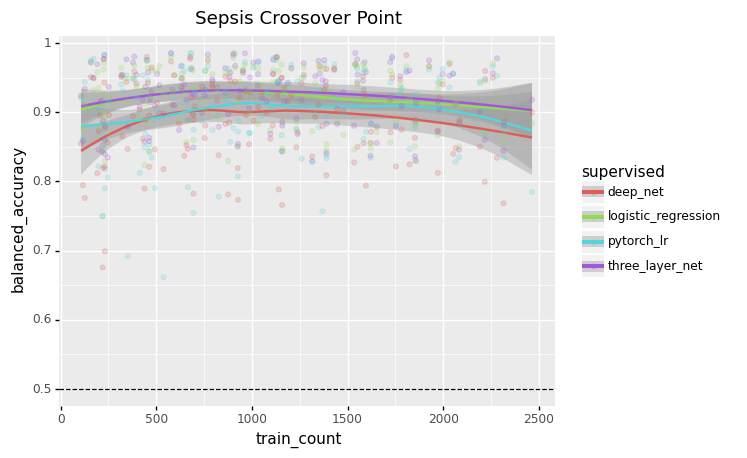

<ggplot: (8743828826909)>

In [10]:
plot = ggplot(sepsis_metrics, aes(x='train_count', y='balanced_accuracy', color='supervised')) 
plot += geom_smooth()
plot += geom_point(alpha=.2)
plot += geom_hline(yintercept=.5, linetype='dashed')
plot += ggtitle('Sepsis Crossover Point')
plot

## TB Not Batch Effect Corrected

In [80]:
in_files = glob.glob('../../results/keep_ratios.tb*.tsv')
in_files = [file for file in in_files if 'be_corrected' not in file]
print(in_files[:5])

['../../results/keep_ratios.tb.logistic_regression.refinebio_labeled_dataset.0.tsv', '../../results/keep_ratios.tb.pytorch_supervised.refinebio_labeled_dataset.1.tsv', '../../results/keep_ratios.tb.deep_net.refinebio_labeled_dataset.2.tsv', '../../results/keep_ratios.tb.logistic_regression.refinebio_labeled_dataset.1.tsv', '../../results/keep_ratios.tb.deep_net.refinebio_labeled_dataset.3.tsv']


In [81]:
tb_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('tb.')[-1]
    model_info = model_info.split('.')
        
    supervised_model = model_info[0]
             
    new_df['supervised'] = supervised_model
    
    new_df['seed'] = model_info[-2]
        
    tb_metrics = pd.concat([tb_metrics, new_df])
    
tb_metrics['train_count'] = tb_metrics['train sample count']

# Looking at the training curves, deep_net isn't actually training
# I need to fix it going forward, but for now I can clean up the visualizations by removing it
tb_metrics = tb_metrics[~(tb_metrics['supervised'] == 'deep_net')]
tb_metrics['supervised'] = tb_metrics['supervised'].str.replace('pytorch_supervised', 'three_layer_net')
tb_metrics

,accuracy,balanced_accuracy,f1_score,train studies,train samples,val samples,train sample count,fraction of data used,supervised,seed,train_count
0,0.360614,0.391619,0.269006,"GSE73408,GSE40553,GSE19491,GSE58411,GSE38511,G...","GSM777379,GSM996438,SRR3745139,GSM1892930,GSM2...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",52,0.1,logistic_regression,refinebio_labeled_dataset,52
1,0.415601,0.456938,0.289269,"GSE66099,GSE26378,GSE51808,GSE31348,GSE95233,S...","GSM777379,GSM996438,SRR3745139,GSM1892930,GSM2...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",105,0.2,logistic_regression,refinebio_labeled_dataset,105
2,0.401535,0.441409,0.277778,"GSE66099,GSE42834,GSE26378,GSE51808,GSE31348,G...","GSM777379,GSM996438,SRR3745139,GSM1892930,GSM2...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",158,0.3,logistic_regression,refinebio_labeled_dataset,158
3,0.404092,0.442746,0.287462,"GSE66099,GSE42834,GSE26378,GSE51808,GSE31348,G...","GSM777379,GSM996438,SRR3745139,GSM1892930,GSM2...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",210,0.4,logistic_regression,refinebio_labeled_dataset,210
4,0.450128,0.499513,0.295082,"GSE66099,GSE42834,GSE26378,GSE51808,GSE31348,G...","GSM777379,GSM996438,SRR3745139,GSM1892930,GSM2...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",263,0.5,logistic_regression,refinebio_labeled_dataset,263
...,...,...,...,...,...,...,...,...,...,...,...
35,0.870841,0.893204,0.859574,"GSE66099,GSE28750,GSE64338,GSE9960,SRP049820,G...","GSM996367,GSM912842,SRR3235929,GSM824762,SRR47...","GSM1050948,GSM1050971,GSM1050988,GSM1050991,GS...",849,0.6,three_layer_net,refinebio_labeled_dataset,849
36,0.861057,0.885113,0.850526,"GSE66099,GSE28750,GSE64338,GSE9960,SRP049820,G...","GSM996367,GSM912842,SRR3235929,GSM824762,SRR47...","GSM1050948,GSM1050971,GSM1050988,GSM1050991,GS...",991,0.7,three_layer_net,refinebio_labeled_dataset,991
37,0.906067,0.902616,0.881773,"GSE66099,GSE28750,GSE64338,GSE9960,SRP049820,G...","GSM996367,GSM912842,SRR3235929,GSM824762,SRR47...","GSM1050948,GSM1050971,GSM1050988,GSM1050991,GS...",1132,0.8,three_layer_net,refinebio_labeled_dataset,1132
38,0.866928,0.889968,0.855932,"GSE66099,GSE28750,GSE64338,GSE9960,SRP049820,G...","GSM996367,GSM912842,SRR3235929,GSM824762,SRR47...","GSM1050948,GSM1050971,GSM1050988,GSM1050991,GS...",1274,0.9,three_layer_net,refinebio_labeled_dataset,1274


/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


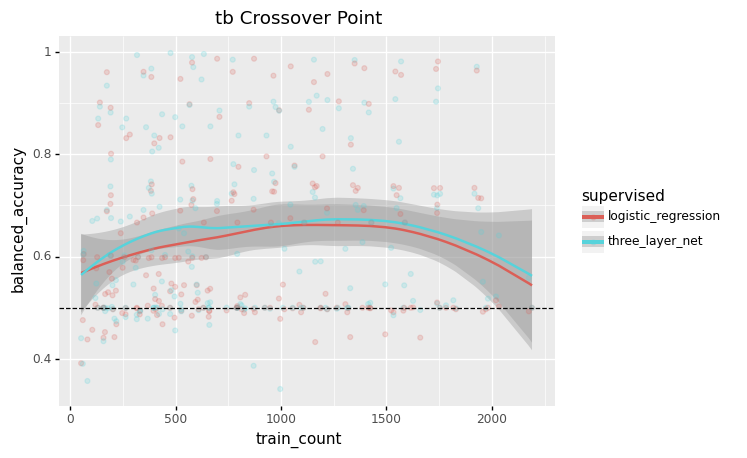

<ggplot: (8737354047967)>

In [82]:
plot = ggplot(tb_metrics, aes(x='train_count', y='balanced_accuracy', color='supervised')) 
plot += geom_smooth()
plot += geom_point(alpha=.2)
plot += geom_hline(yintercept=.5, linetype='dashed')
plot += ggtitle('tb Crossover Point')
plot

## Lupus Analyses

In [83]:
in_files = glob.glob('../../results/keep_ratios.lupus*.tsv')
in_files = [file for file in in_files if 'be_corrected' in file]
print(in_files[:5])

['../../results/keep_ratios.lupus.logistic_regression.refinebio_labeled_dataset.1.be_corrected.tsv', '../../results/keep_ratios.lupus.pytorch_supervised.refinebio_labeled_dataset.1.be_corrected.tsv', '../../results/keep_ratios.lupus.logistic_regression.refinebio_labeled_dataset.3.be_corrected.tsv', '../../results/keep_ratios.lupus.deep_net.refinebio_labeled_dataset.0.be_corrected.tsv', '../../results/keep_ratios.lupus.pytorch_supervised.refinebio_labeled_dataset.0.be_corrected.tsv']


In [84]:
lupus_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('lupus.')[-1]
    model_info = model_info.split('.')
        
    supervised_model = model_info[0]
             
    new_df['supervised'] = supervised_model
    
    new_df['seed'] = model_info[-2]
        
    lupus_metrics = pd.concat([lupus_metrics, new_df])
    
lupus_metrics['train_count'] = lupus_metrics['train sample count']

# Looking at the training curves, deep_net isn't actually training
# I need to fix it going forward, but for now I can clean up the visualizations by removing it
lupus_metrics = lupus_metrics[~(lupus_metrics['supervised'] == 'deep_net')]
lupus_metrics['supervised'] = lupus_metrics['supervised'].str.replace('pytorch_supervised', 'three_layer_net')
lupus_metrics

,accuracy,balanced_accuracy,f1_score,train studies,train samples,val samples,train sample count,fraction of data used,supervised,seed,train_count
0,0.666239,0.576775,0.350000,"GSE99967,GSE33341,SRP092402,GSE33580,GSE93606,...","GSM484603,GSM955745,GSM2203645,GSM2087056,GSM9...","GSM102965,GSM1100843,GSM1100844,GSM1100845,GSM...",77,0.1,logistic_regression,1,77
1,0.614891,0.547628,0.361702,"GSE99967,GSE33341,GSE66099,SRP092402,GSE33580,...","GSM484603,GSM955745,GSM2203645,GSM2087056,GSM9...","GSM102965,GSM1100843,GSM1100844,GSM1100845,GSM...",154,0.2,logistic_regression,1,154
2,0.625160,0.548204,0.339367,"GSE99967,GSE33341,GSE66099,SRP092402,GSE33580,...","GSM484603,GSM955745,GSM2203645,GSM2087056,GSM9...","GSM102965,GSM1100843,GSM1100844,GSM1100845,GSM...",231,0.3,logistic_regression,1,231
3,0.627728,0.567485,0.403292,"GSE99967,GSE33341,GSE66099,SRP092402,GSE33580,...","GSM484603,GSM955745,GSM2203645,GSM2087056,GSM9...","GSM102965,GSM1100843,GSM1100844,GSM1100845,GSM...",308,0.4,logistic_regression,1,308
4,0.620026,0.572681,0.432950,"GSE99967,GSE33341,GSE66099,SRP092402,GSE33580,...","GSM484603,GSM955745,GSM2203645,GSM2087056,GSM9...","GSM102965,GSM1100843,GSM1100844,GSM1100845,GSM...",385,0.5,logistic_regression,1,385
...,...,...,...,...,...,...,...,...,...,...,...
45,0.643460,0.557592,0.206573,"GSE11755,GSE39088,GSE13015,GSE65682,GSE32198,G...","E-MEXP-1635-04SE58HA300104,GSM2630935,GSM16029...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",556,0.6,three_layer_net,4,556
46,0.668776,0.680064,0.642369,"GSE11755,GSE39088,GSE13015,GSE65682,GSE32198,G...","E-MEXP-1635-04SE58HA300104,GSM2630935,GSM16029...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",649,0.7,three_layer_net,4,649
47,0.668776,0.592409,0.326180,"GSE11755,GSE39088,GSE13015,GSE65682,GSE32198,G...","E-MEXP-1635-04SE58HA300104,GSM2630935,GSM16029...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",742,0.8,three_layer_net,4,742
48,0.637131,0.683348,0.671756,"GSE11755,GSE39088,GSE13015,GSE65682,GSE32198,E...","E-MEXP-1635-04SE58HA300104,GSM2630935,GSM16029...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",835,0.9,three_layer_net,4,835


/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


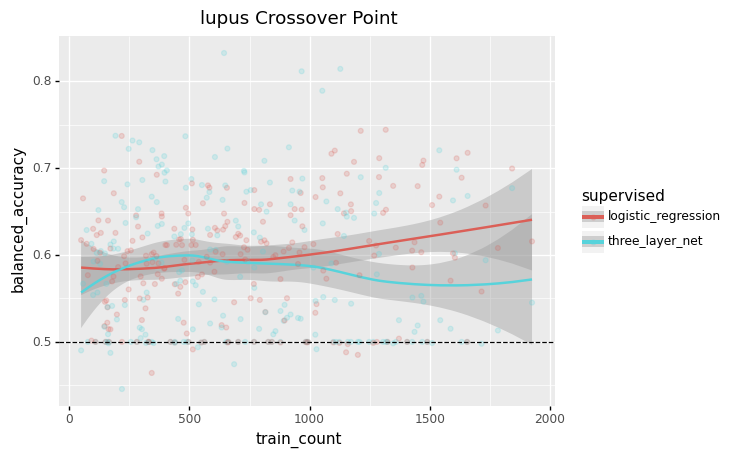

<ggplot: (8737353934888)>

In [85]:
plot = ggplot(lupus_metrics, aes(x='train_count', y='balanced_accuracy', color='supervised')) 
plot += geom_smooth()
plot += geom_point(alpha=.2)
plot += geom_hline(yintercept=.5, linetype='dashed')
plot += ggtitle('lupus Crossover Point')
plot

## Lupus Not Batch Effect Corrected

In [86]:
in_files = glob.glob('../../results/keep_ratios.lupus*.tsv')
in_files = [file for file in in_files if 'be_corrected' not in file]
print(in_files[:5])

['../../results/keep_ratios.lupus.logistic_regression.refinebio_labeled_dataset.4.tsv', '../../results/keep_ratios.lupus.deep_net.refinebio_labeled_dataset.3.tsv', '../../results/keep_ratios.lupus.logistic_regression.refinebio_labeled_dataset.0.tsv', '../../results/keep_ratios.lupus.deep_net.refinebio_labeled_dataset.2.tsv', '../../results/keep_ratios.lupus.pytorch_supervised.refinebio_labeled_dataset.3.tsv']


In [87]:
lupus_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('lupus.')[-1]
    model_info = model_info.split('.')
        
    supervised_model = model_info[0]
             
    new_df['supervised'] = supervised_model
    
    new_df['seed'] = model_info[-2]
        
    lupus_metrics = pd.concat([lupus_metrics, new_df])
    
lupus_metrics['train_count'] = lupus_metrics['train sample count']

# Looking at the training curves, deep_net isn't actually training
# I need to fix it going forward, but for now I can clean up the visualizations by removing it
lupus_metrics = lupus_metrics[~(lupus_metrics['supervised'] == 'deep_net')]
lupus_metrics['supervised'] = lupus_metrics['supervised'].str.replace('pytorch_supervised', 'three_layer_net')
lupus_metrics

,accuracy,balanced_accuracy,f1_score,train studies,train samples,val samples,train sample count,fraction of data used,supervised,seed,train_count
0,0.788079,0.633566,0.433628,"GSE57065,GSE28750,SRP092402,GSE4607,GSE50635,G...","GSM1100973,GSM830163,GSM2631065,GSM955680,GSM1...","E-MEXP-3567-C13,E-MEXP-3567-H_C08,E-MEXP-3567-...",159,0.1,logistic_regression,refinebio_labeled_dataset,159
1,0.814570,0.685179,0.537190,"GSE57065,GSE28750,SRP092402,GSE4607,GSE50635,G...","GSM1100973,GSM830163,GSM2631065,GSM955680,GSM1...","E-MEXP-3567-C13,E-MEXP-3567-H_C08,E-MEXP-3567-...",319,0.2,logistic_regression,refinebio_labeled_dataset,319
2,0.771523,0.616093,0.400000,"GSE57065,GSE28750,SRP092402,GSE4607,GSE50635,G...","GSM1100973,GSM830163,GSM2631065,GSM955680,GSM1...","E-MEXP-3567-C13,E-MEXP-3567-H_C08,E-MEXP-3567-...",479,0.3,logistic_regression,refinebio_labeled_dataset,479
3,0.811258,0.676615,0.521008,"GSE57065,GSE28750,SRP092402,GSE4607,GSE50635,G...","GSM1100973,GSM830163,GSM2631065,GSM955680,GSM1...","E-MEXP-3567-C13,E-MEXP-3567-H_C08,E-MEXP-3567-...",638,0.4,logistic_regression,refinebio_labeled_dataset,638
4,0.794702,0.627459,0.415094,"GSE57065,GSE28750,SRP092402,GSE4607,GSE50635,G...","GSM1100973,GSM830163,GSM2631065,GSM955680,GSM1...","E-MEXP-3567-C13,E-MEXP-3567-H_C08,E-MEXP-3567-...",798,0.5,logistic_regression,refinebio_labeled_dataset,798
...,...,...,...,...,...,...,...,...,...,...,...
45,0.508439,0.428348,0.025105,"GSE40240,GSE57065,SRP077975,GSE98793,GSE38511,...","E-MEXP-1635-04SE58HA300104,GSM2630935,GSM16029...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",556,0.6,three_layer_net,refinebio_labeled_dataset,556
46,0.590717,0.530442,0.302158,"GSE40240,GSE57065,SRP077975,GSE98793,GSE38511,...","E-MEXP-1635-04SE58HA300104,GSM2630935,GSM16029...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",649,0.7,three_layer_net,refinebio_labeled_dataset,649
47,0.573840,0.494182,0.136752,"GSE40240,GSE57065,SRP077975,GSE98793,GSE38511,...","E-MEXP-1635-04SE58HA300104,GSM2630935,GSM16029...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",742,0.8,three_layer_net,refinebio_labeled_dataset,742
48,0.622363,0.558646,0.329588,"GSE40240,GSE57065,SRP077975,GSE98793,GSE38511,...","E-MEXP-1635-04SE58HA300104,GSM2630935,GSM16029...","GSM1100843,GSM1100844,GSM1100845,GSM1100847,GS...",835,0.9,three_layer_net,refinebio_labeled_dataset,835


/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


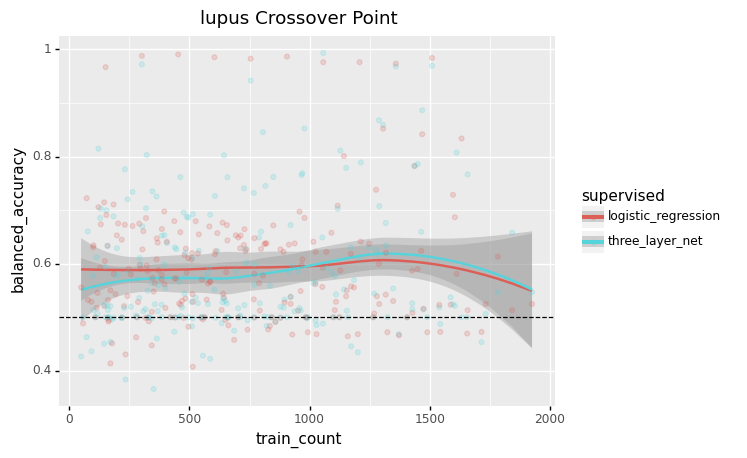

<ggplot: (8737353996081)>

In [88]:
plot = ggplot(lupus_metrics, aes(x='train_count', y='balanced_accuracy', color='supervised')) 
plot += geom_smooth()
plot += geom_point(alpha=.2)
plot += geom_hline(yintercept=.5, linetype='dashed')
plot += ggtitle('lupus Crossover Point')
plot